# Clincal data Bfield analysis and presentation

## Showing all acquired plots

Import all data into a dict of dfs for data manipulation 

In [1]:
import os
import pandas as pd
from pathlib import Path

# Define the data folder path
data_folder = Path('DataCollectionFolderMRIProject')

prefixes = ['00', 'A3', 'A6', 'D3', 'G3', 'G6']

# collect all matching files
csv_files = []

# For '00': N1 to N4
csv_files.extend([f"MRI3Tesla_00N{i}.csv" for i in range(1, 5)])

# For others: each prefix has N1 and N2
for pref in prefixes[1:]:  # skip '00' since already handled
    csv_files.extend([f"MRI3Tesla_{pref}N1.csv", f"MRI3Tesla_{pref}N2.csv"])

# Now filter to only existing files
existing_files = [f for f in csv_files if (data_folder / f).exists()]

# sort them for consistent order
existing_files.sort()

print("Found files:", existing_files)

# Dictionary to hold the data
data_dict = {}

for file_name in existing_files:
    file_path = data_folder / file_name
    
    # Read CSV, assuming comma-separated and headers as you showed
    df = pd.read_csv(file_path)
    
    # Keep only time and flux columns
    df = df[['time', 'flux']]
    
    # Create a key: strip "MRI3Tesla_" and ".csv", e.g., "00N1" or "A3N2"
    key = file_name.replace("MRI3Tesla_", "").replace(".csv", "")
    
    data_dict[key] = df
    
    print(f"Loaded {file_name} -> key '{key}' with shape {df.shape}")

# Example usage after loading
print("\nExample: data_dict['00N1'].head()")
print(data_dict['00N1'].head())

Found files: ['MRI3Tesla_00N1.csv', 'MRI3Tesla_00N2.csv', 'MRI3Tesla_00N3.csv', 'MRI3Tesla_00N4.csv', 'MRI3Tesla_A3N1.csv', 'MRI3Tesla_A3N2.csv', 'MRI3Tesla_A6N1.csv', 'MRI3Tesla_A6N2.csv', 'MRI3Tesla_D3N1.csv', 'MRI3Tesla_D3N2.csv', 'MRI3Tesla_G3N1.csv', 'MRI3Tesla_G3N2.csv', 'MRI3Tesla_G6N1.csv', 'MRI3Tesla_G6N2.csv']
Loaded MRI3Tesla_00N1.csv -> key '00N1' with shape (120, 2)
Loaded MRI3Tesla_00N2.csv -> key '00N2' with shape (120, 2)
Loaded MRI3Tesla_00N3.csv -> key '00N3' with shape (120, 2)
Loaded MRI3Tesla_00N4.csv -> key '00N4' with shape (120, 2)
Loaded MRI3Tesla_A3N1.csv -> key 'A3N1' with shape (120, 2)
Loaded MRI3Tesla_A3N2.csv -> key 'A3N2' with shape (120, 2)
Loaded MRI3Tesla_A6N1.csv -> key 'A6N1' with shape (120, 2)
Loaded MRI3Tesla_A6N2.csv -> key 'A6N2' with shape (120, 2)
Loaded MRI3Tesla_D3N1.csv -> key 'D3N1' with shape (120, 2)
Loaded MRI3Tesla_D3N2.csv -> key 'D3N2' with shape (120, 2)
Loaded MRI3Tesla_G3N1.csv -> key 'G3N1' with shape (120, 2)
Loaded MRI3Tesla_G

Plot everything to see how data behaves in general, and select best plots

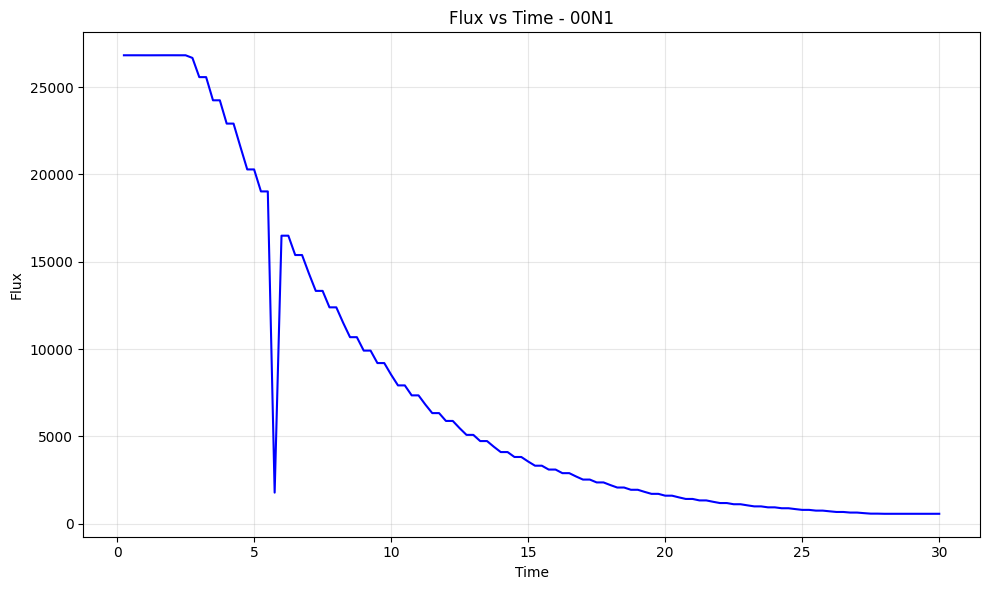

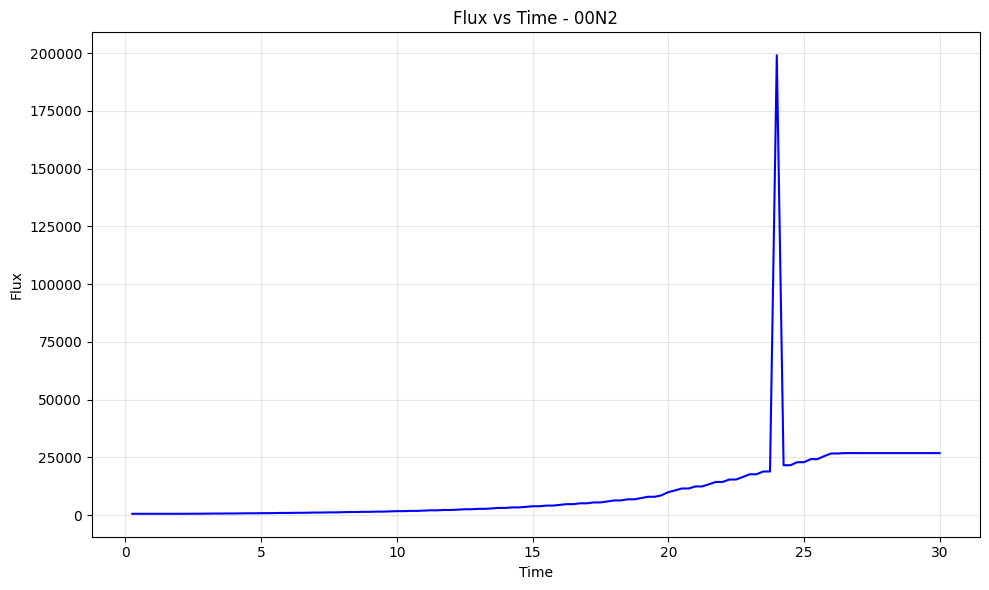

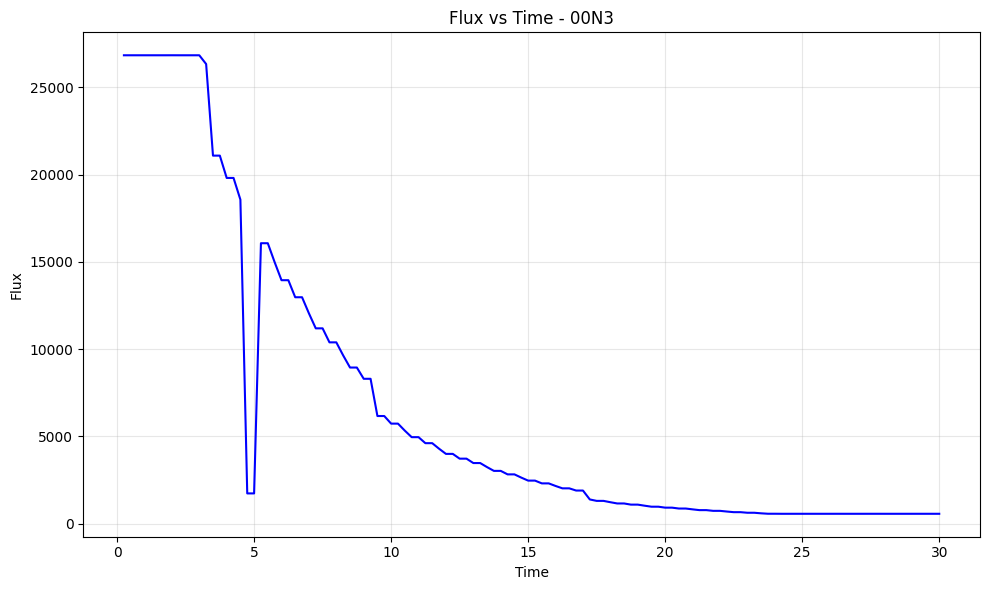

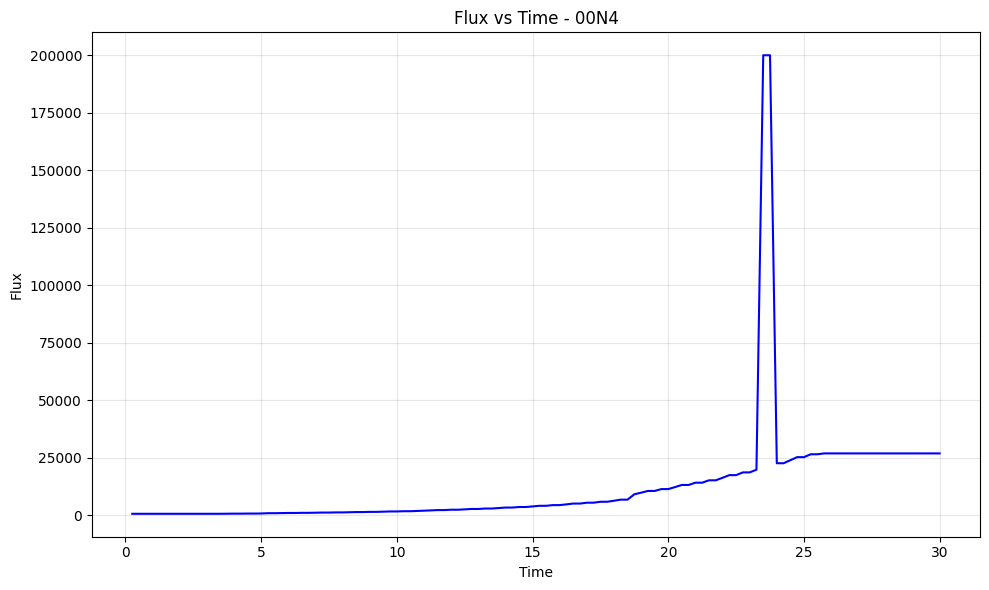

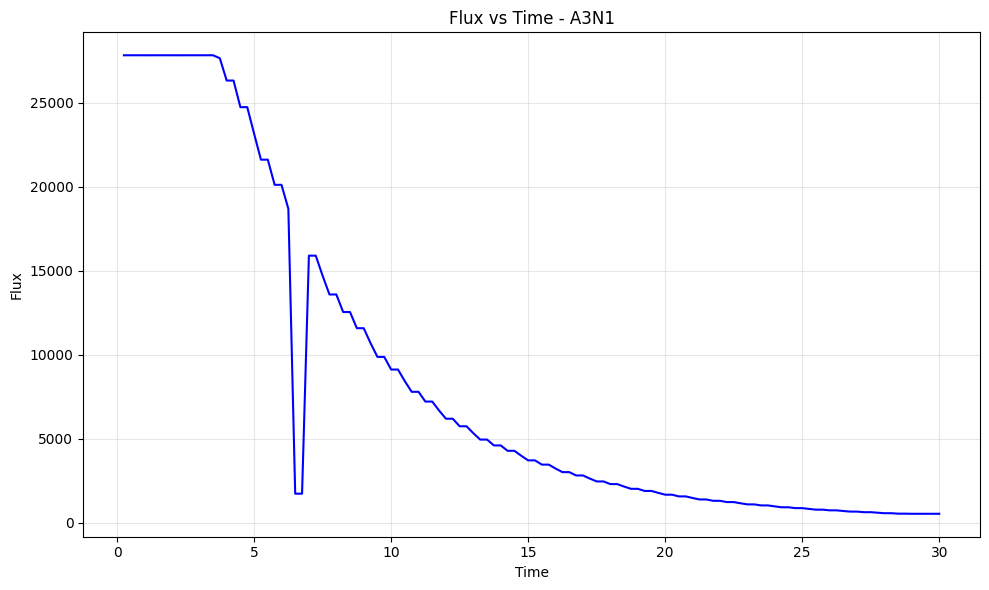

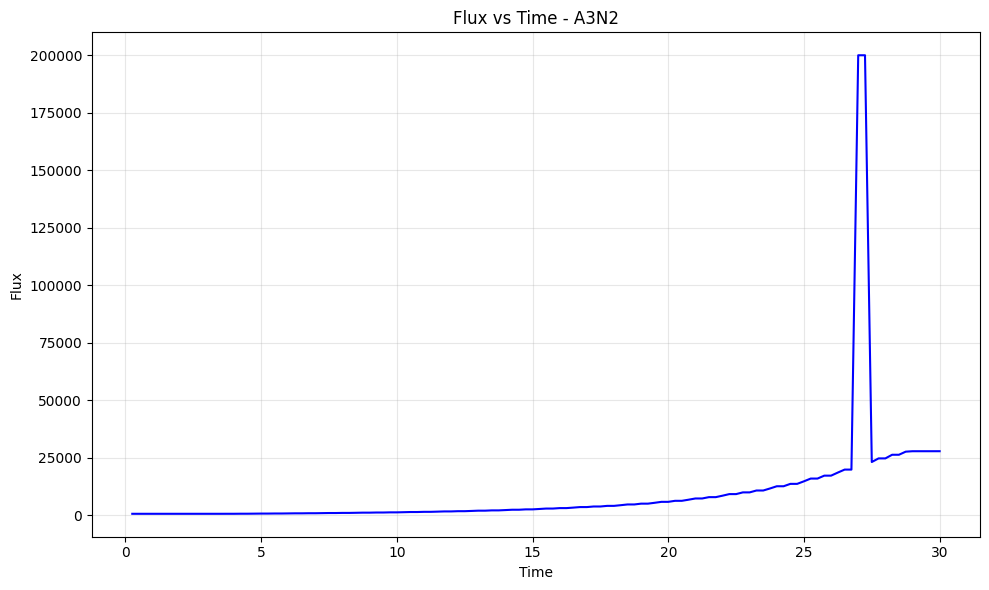

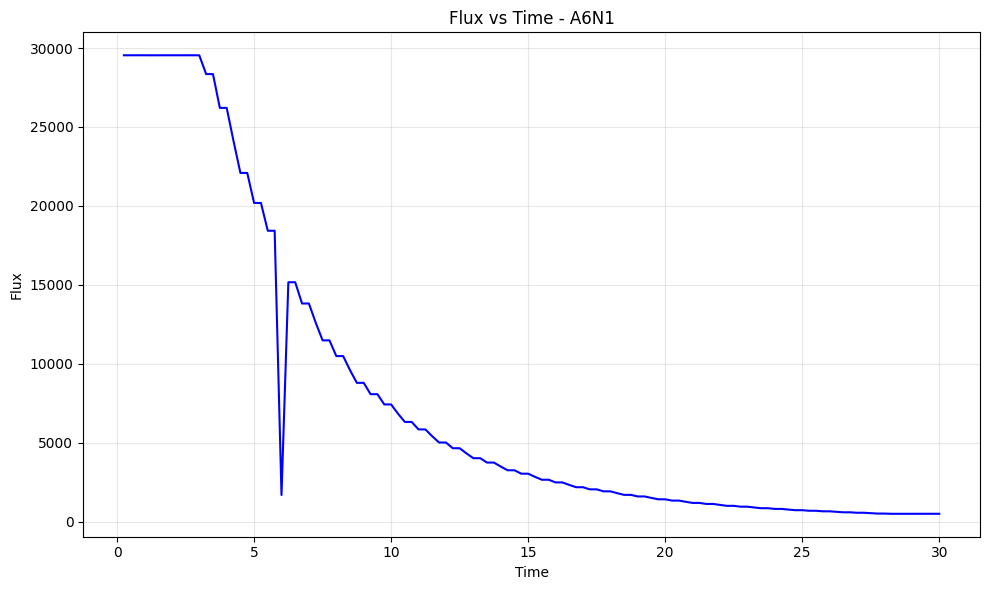

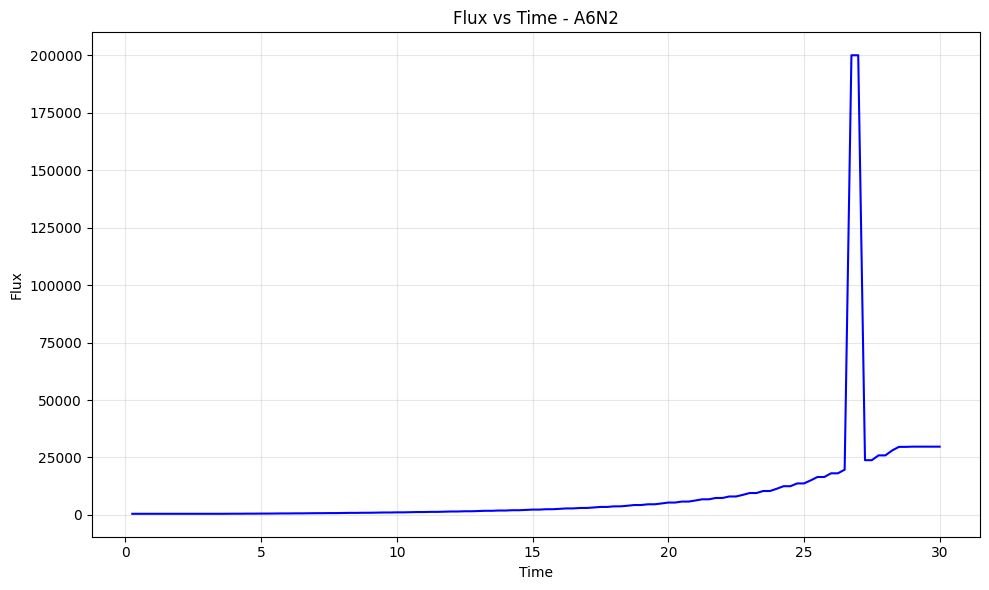

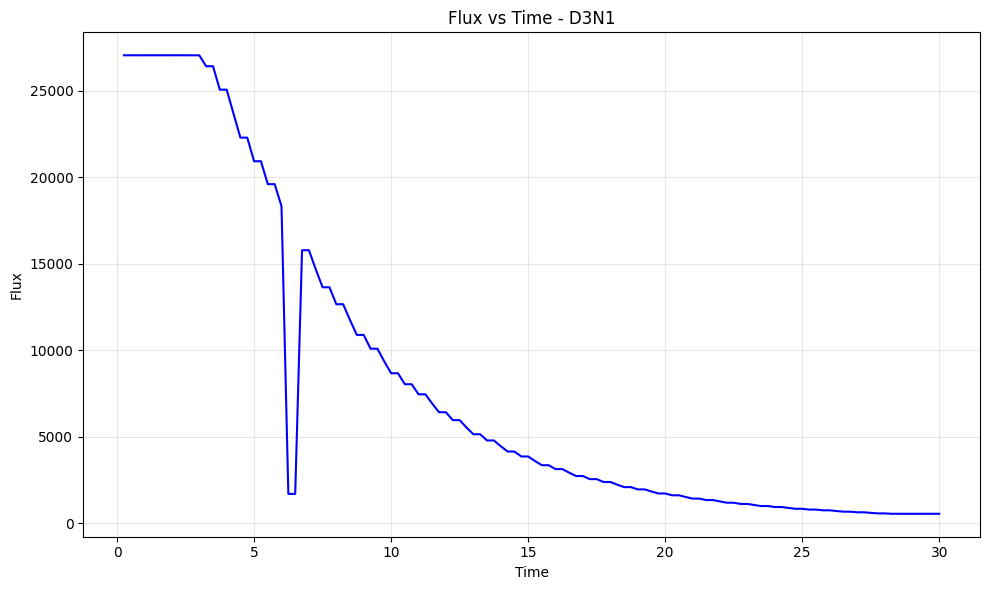

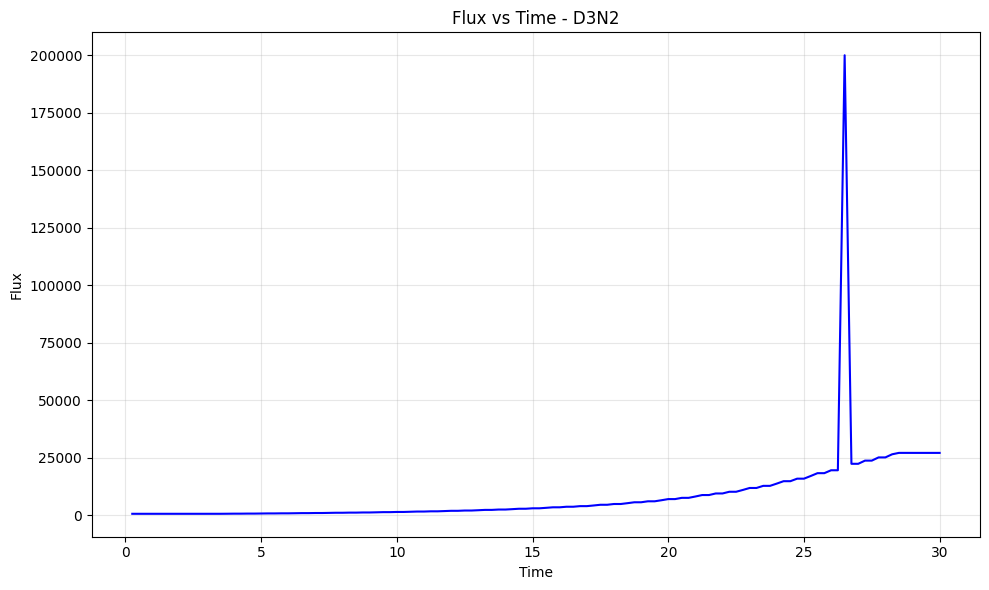

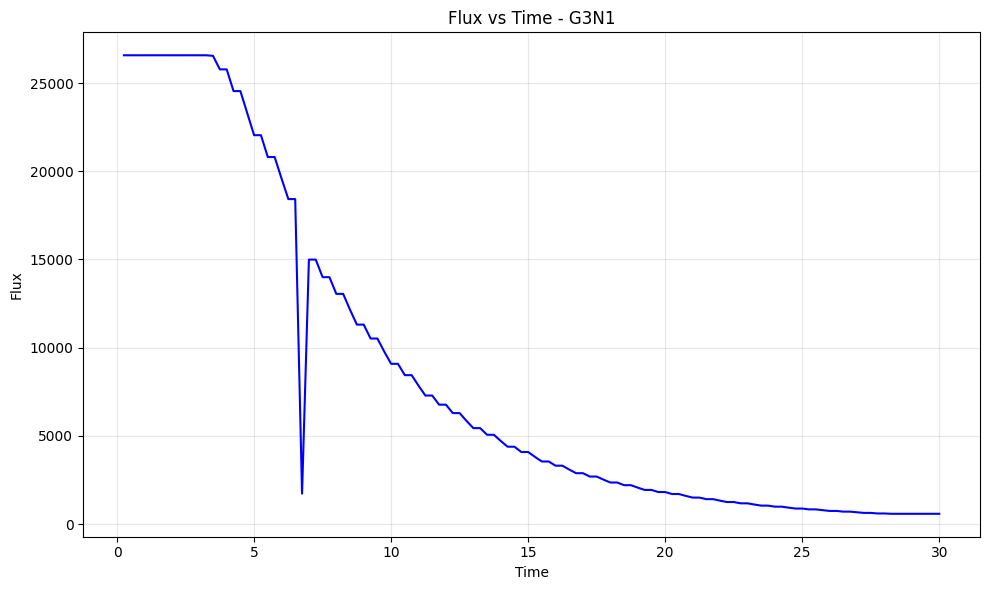

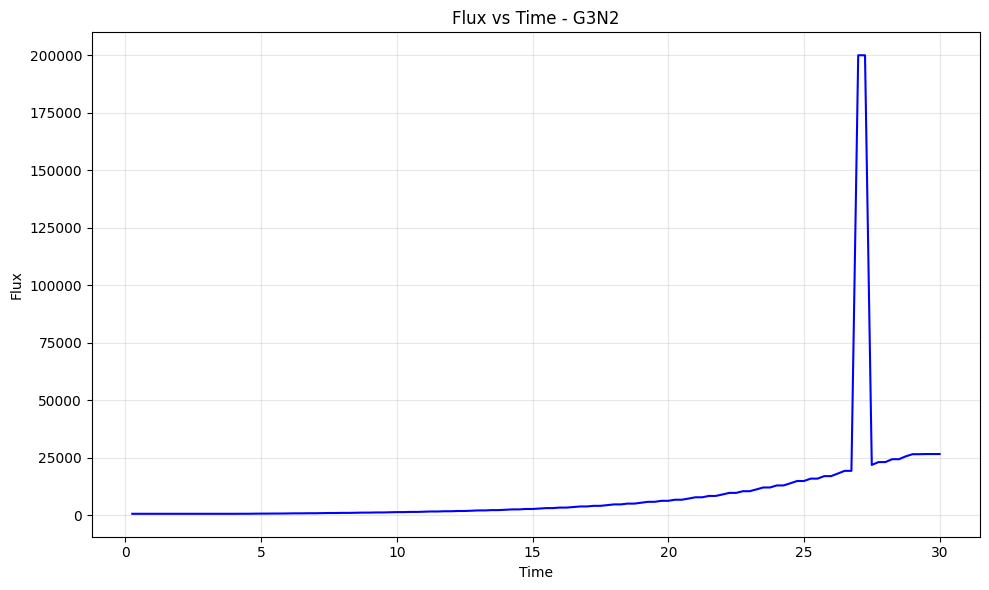

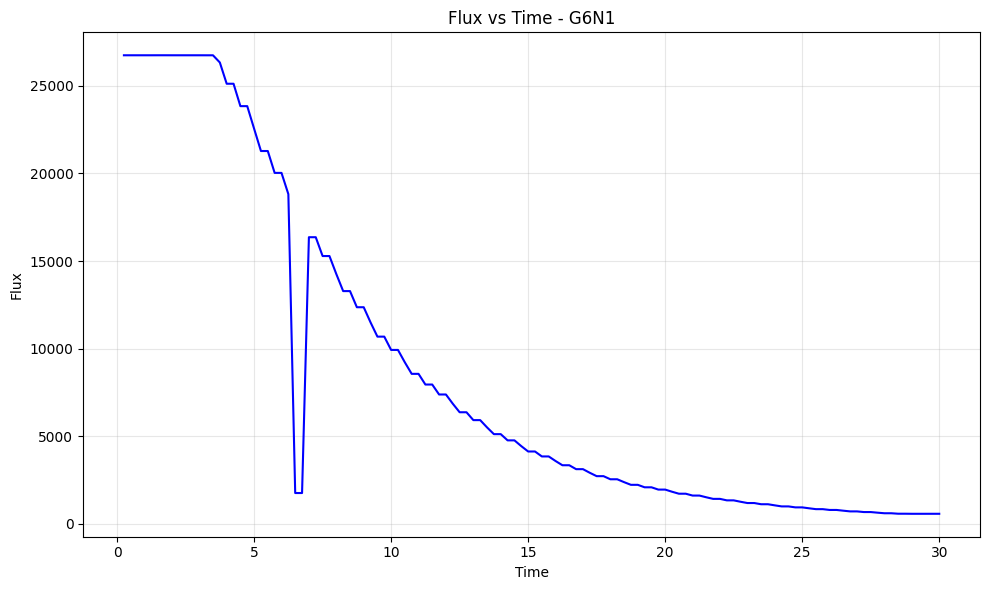

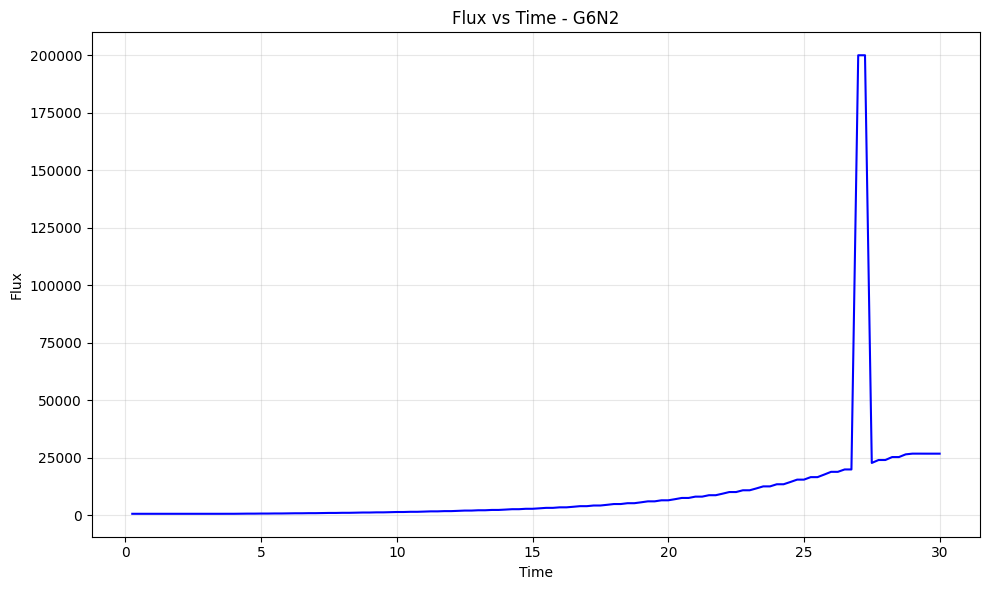

In [2]:
import matplotlib.pyplot as plt
# Sort keys for consistent plotting order
sorted_keys = sorted(data_dict.keys())

# Create a separate plot for each dataset
for key in sorted_keys:
    df = data_dict[key]
    
    plt.figure(figsize=(10, 6))  
    plt.plot(df['time'], df['flux'], label=f'{key}', color='blue')
    
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.title(f'Flux vs Time - {key}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()  

There's a systematic outliner, probably due to the sample rate of the gaussmeter or coding in labview. Keep one of these plots for example. Then focus on G6 for translational

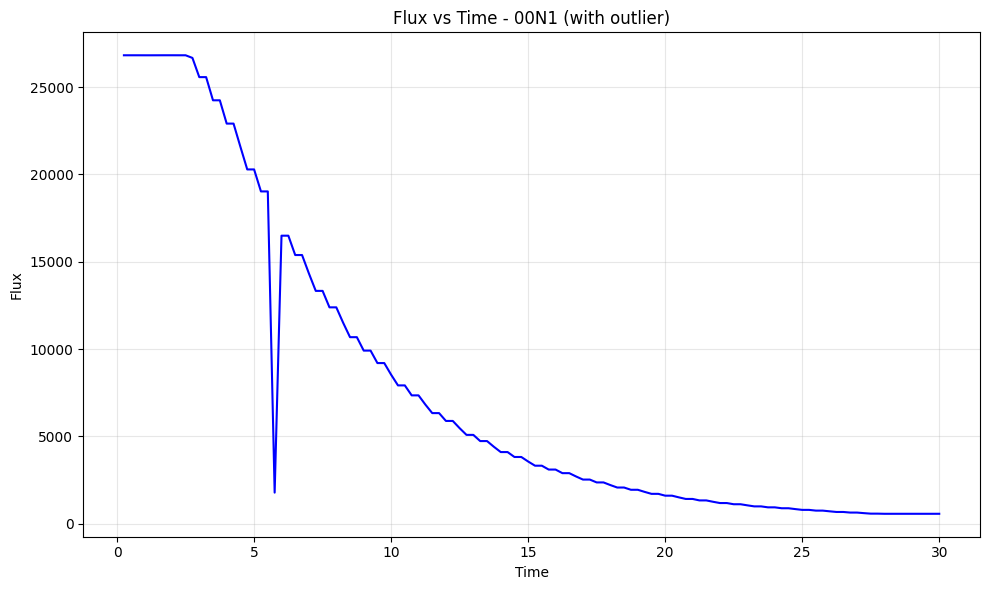

In [3]:
key = '00N1'
df = data_dict[key]

# --- 1. Plot and SAVE the original (with outlier) as PNG ---
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['flux'], label=key, color='blue')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title(f'Flux vs Time - {key} (with outlier)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save to PNG
original_png_path = 'plots/00N1_with_outlier.png'
plt.savefig(original_png_path, dpi=300, bbox_inches='tight')
plt.show()  # Still displays it in the notebook
plt.close()

First let's remove all outliers witha simple exponential fit, making sure we only remove small amounts of data (single digit) data points 

For 00N1: Fit successful. Removed 1 outlier(s) based on residuals > 3*std (1873.711)


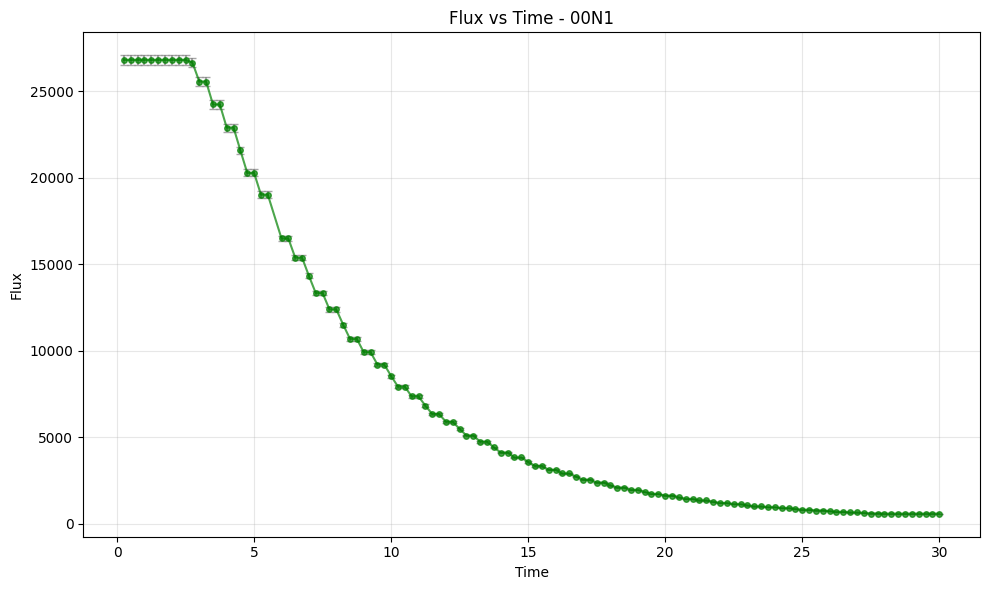

For 00N2: Fit successful. Removed 1 outlier(s) based on residuals > 3*std (16892.055)


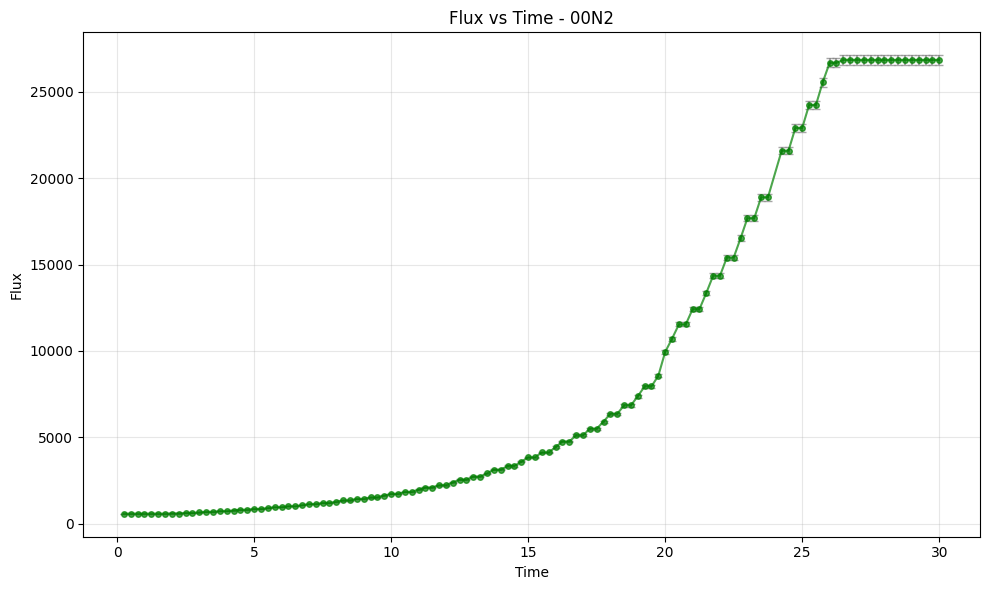

For 00N3: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (2310.722)


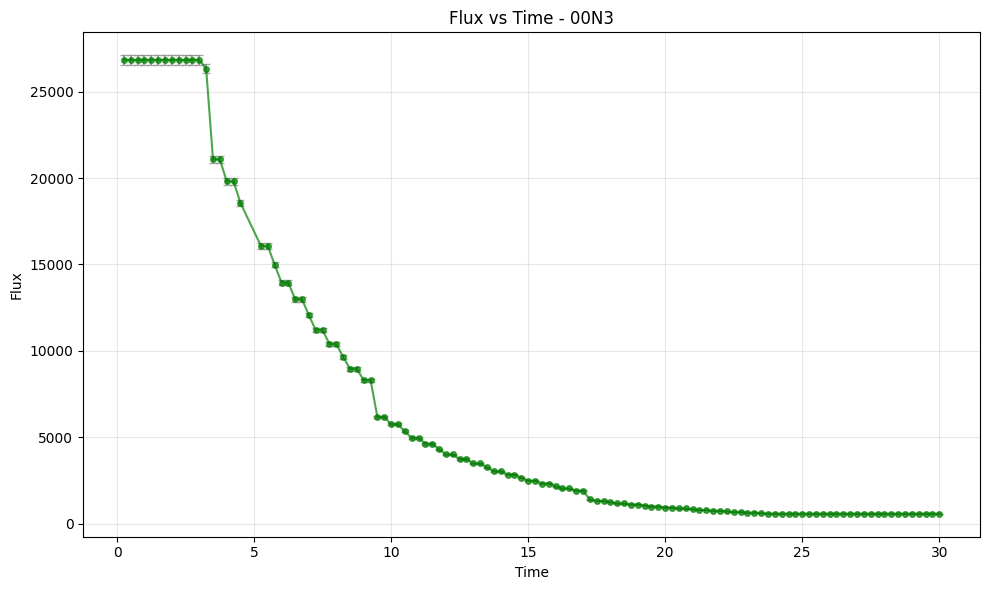

For 00N4: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (23427.732)


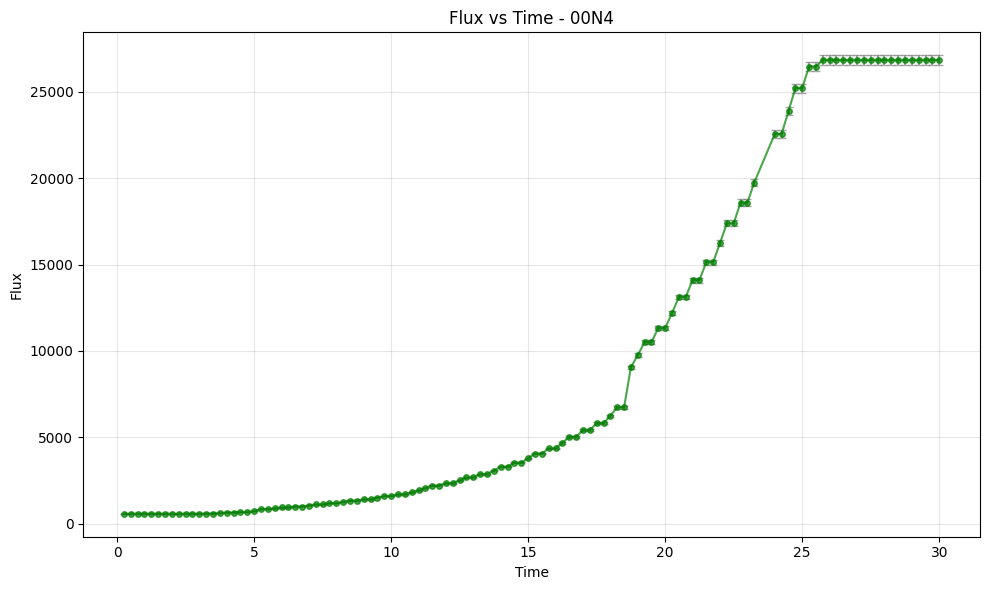

For A3N1: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (2577.052)


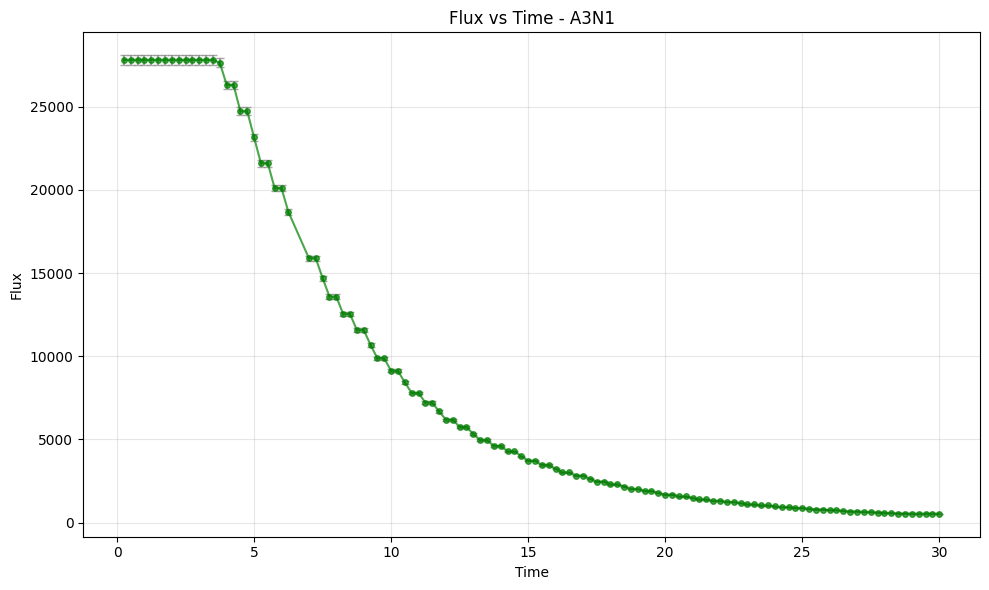

For A3N2: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (23545.770)


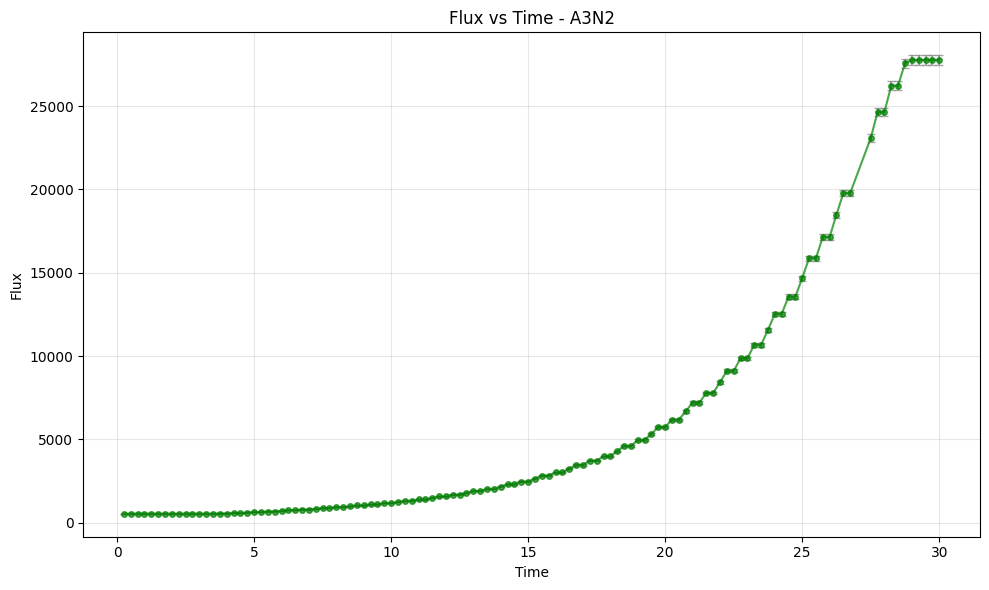

For A6N1: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (2190.826)


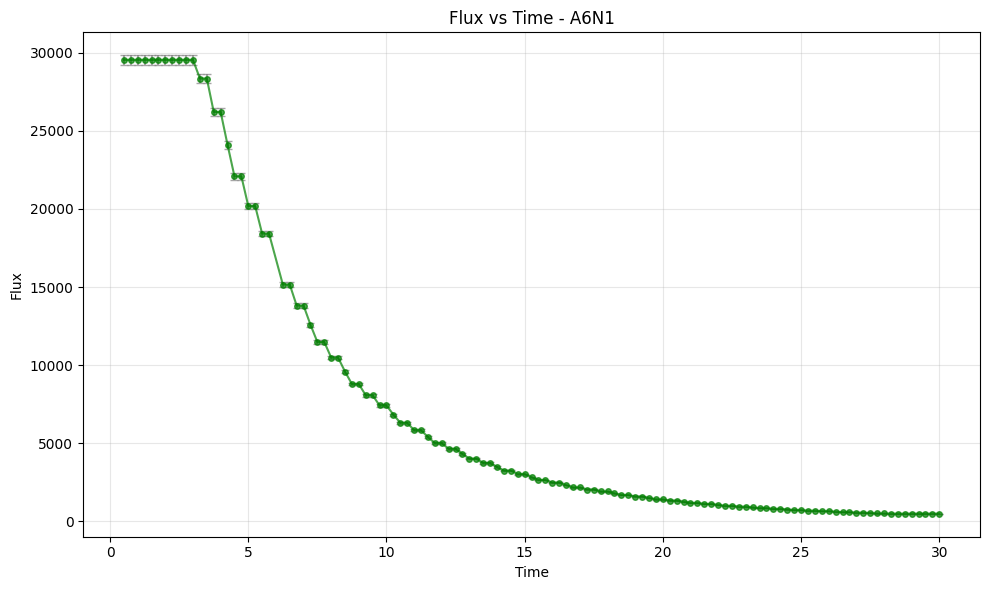

For A6N2: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (23669.578)


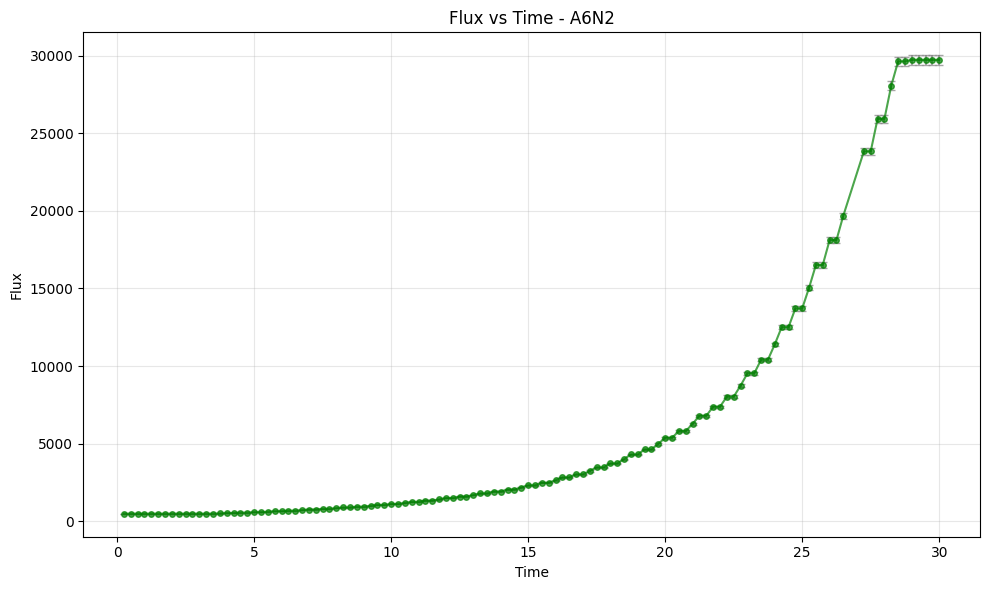

For D3N1: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (2351.152)


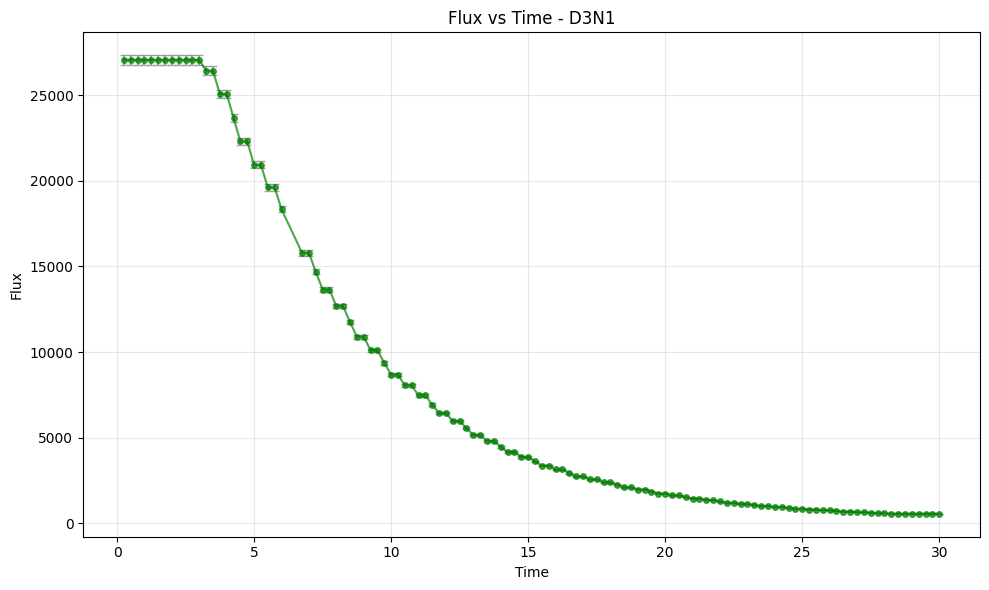

For D3N2: Fit successful. Removed 1 outlier(s) based on residuals > 3*std (17032.314)


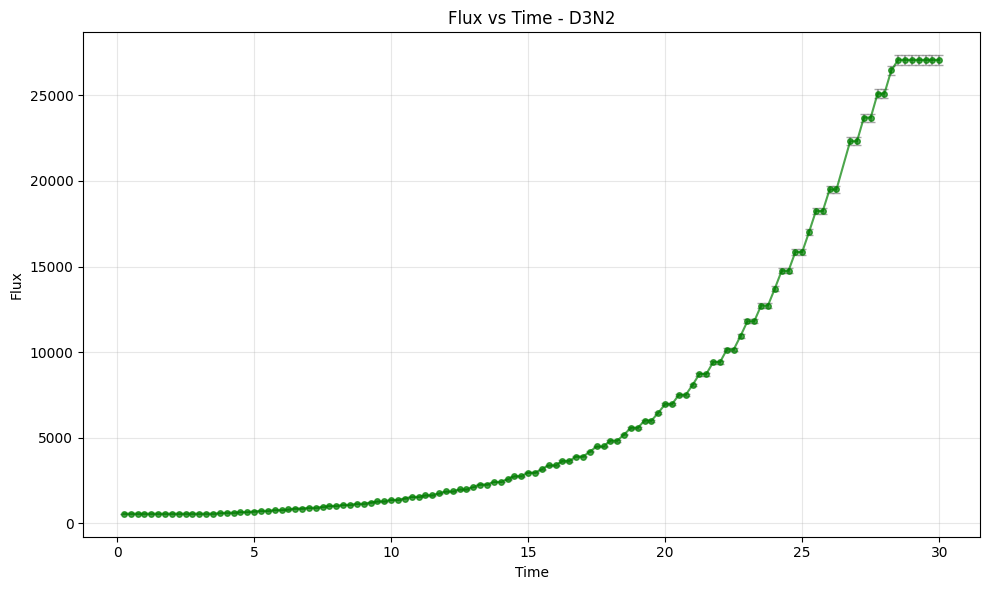

For G3N1: Fit successful. Removed 1 outlier(s) based on residuals > 3*std (2130.460)


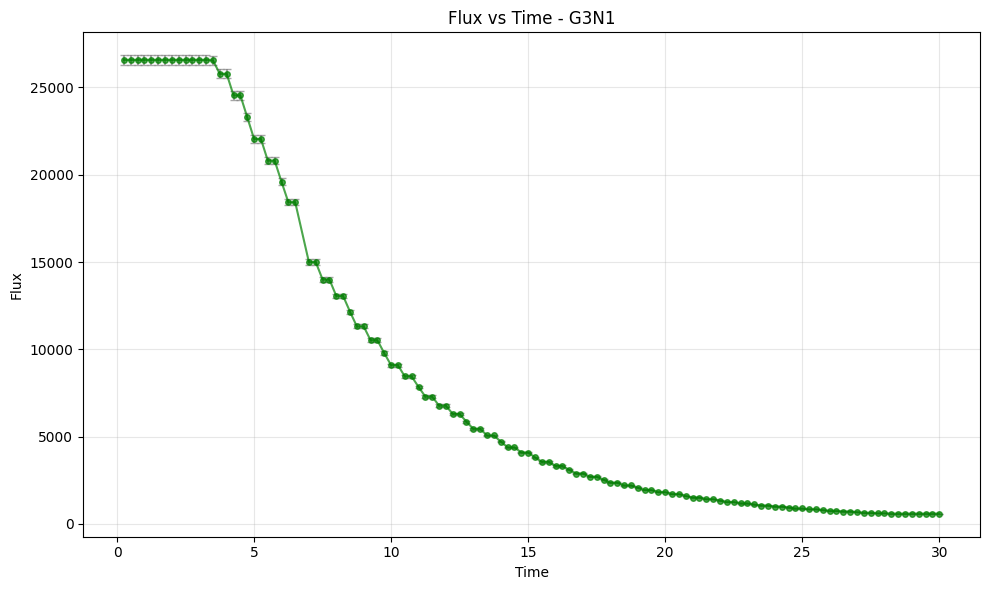

For G3N2: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (23479.643)


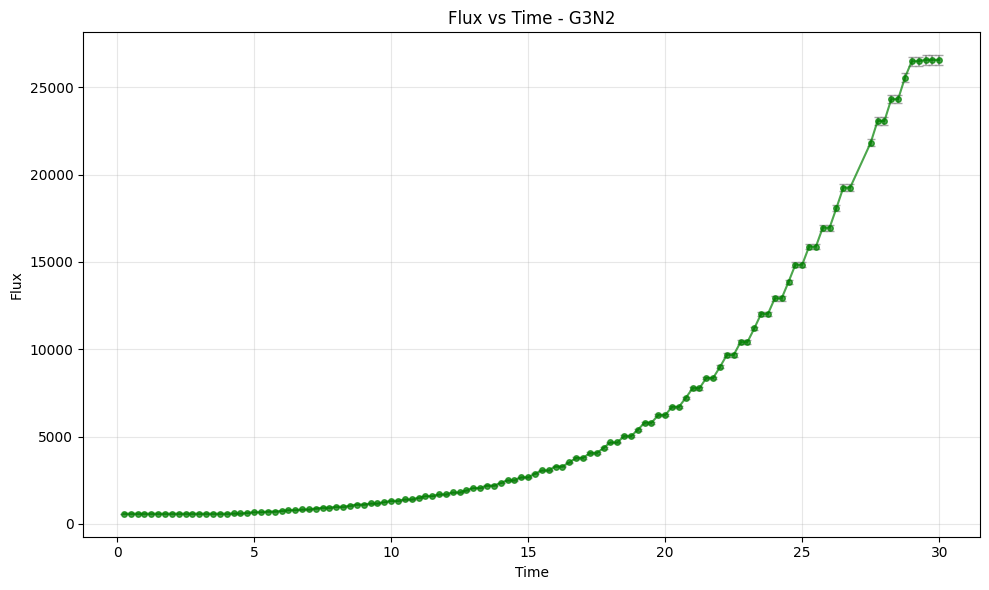

For G6N1: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (2451.023)


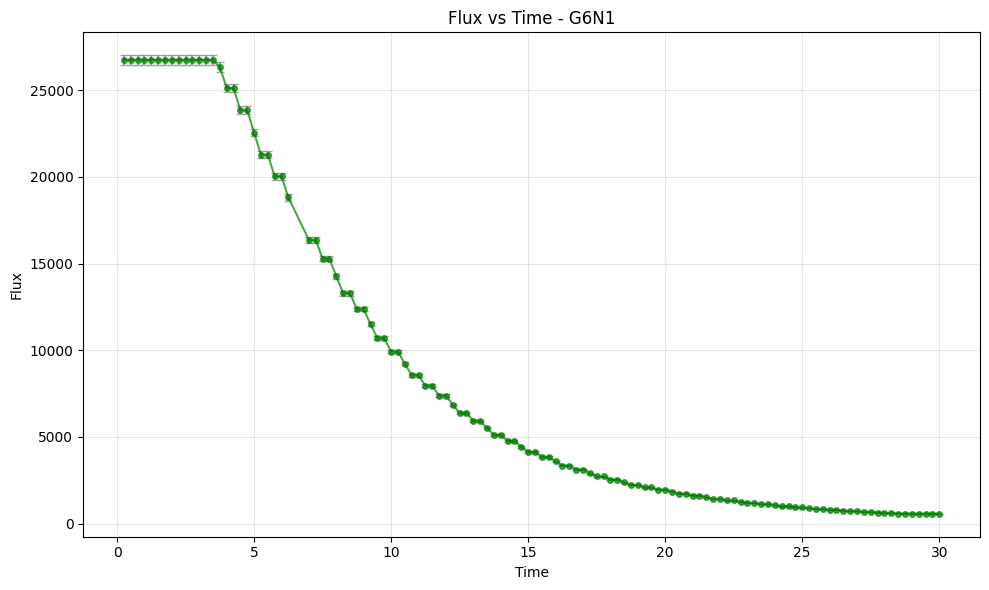

For G6N2: Fit successful. Removed 2 outlier(s) based on residuals > 3*std (23436.728)


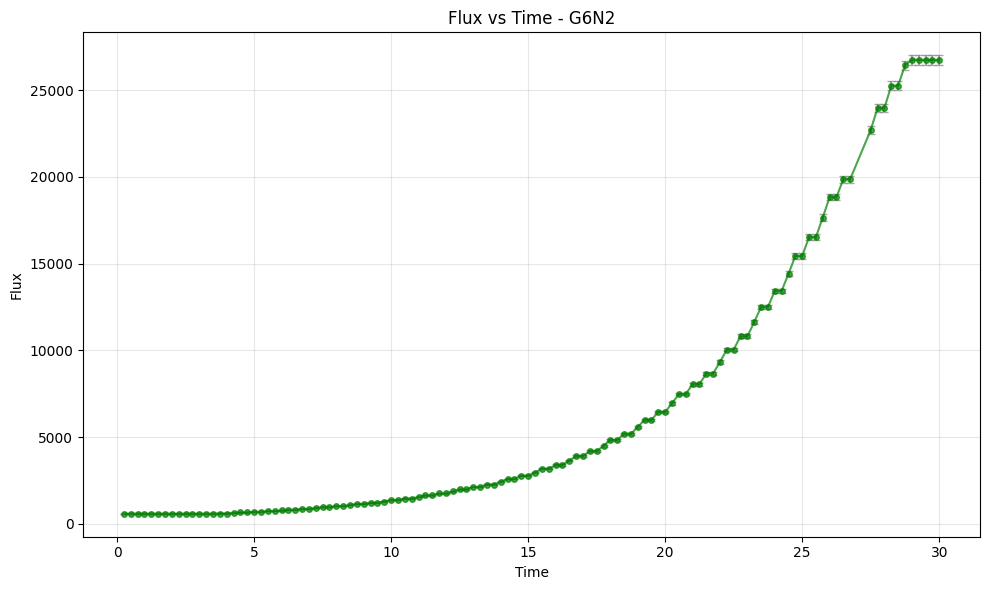

In [4]:
import numpy as np
from scipy.optimize import curve_fit

# Define exponential function for fitting (assuming decay: a * exp(-b * t) + c)
def exp_func(t, a, b, c):
    return a * np.exp(-b * t) + c

# Sort keys for consistent order
sorted_keys = sorted(data_dict.keys())

# create new dict for clean dfs
clean_data_dict = {}

# Loop over all datasets
for key in sorted_keys:
    df = data_dict[key]
    
    # --- Fit exponential model and remove outliers based on residuals ---
    df_clean = df.copy()  # Default to original if fit fails
    try:
        # Initial guesses: a = max flux, b = small positive, c = min flux (for offset)
        p0 = [df['flux'].max(), 0.1, df['flux'].min()]
        
        # Fit the curve
        popt, _ = curve_fit(exp_func, df['time'], df['flux'], p0=p0, maxfev=10000)
        
        # Compute fitted values and residuals
        fitted = exp_func(df['time'].values, *popt)
        residuals = df['flux'].values - fitted
        
        # Standard deviation of residuals
        std_res = np.std(residuals)
        
        # Mask to keep points within 3 * std_res (adjust multiplier if needed, e.g., 2.5 for stricter)
        mask = np.abs(residuals) < 3 * std_res
        
        df_clean = df[mask].copy()
        
        removed = len(df) - len(df_clean)
        print(f"For {key}: Fit successful. Removed {removed} outlier(s) based on residuals > 3*std ({std_res:.3f})")
    
    except Exception as e:
        print(f"Fit failed for {key}: {e}. Using original data for plotting.")
    
    # store new dfs in a dict
    clean_data_dict[key] = df_clean 
    
    # --- Replot the cleaned data ---
    plt.figure(figsize=(10, 6))
    #plt.plot(df_clean['time'], df_clean['flux'], label=f'{key}', color='green')

    # Compute instrument error bars (GM2 spec: ~1% of reading + 1 G absolute)
    yerr = 0.01 * np.abs(df_clean['flux']) + 1.0
    
    plt.errorbar(df_clean['time'], df_clean['flux'], yerr=yerr,
                 label=f'{key}', color='green', fmt='-o', markersize=4, 
                 capsize=3, capthick=1, ecolor='gray', alpha=0.7)
    
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.title(f'Flux vs Time - {key}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    clean_png_path =  'plots/' + f'{key}_clean.png'
    plt.savefig(clean_png_path, dpi=300, bbox_inches='tight')

    plt.show()

## Map to position and cut the repeated ends

Focus on G6 to obtain BgradB

First map to position, we need the velocity for that, 
find the points where the probe wasn't moving to have start and end in time.

In [5]:
# List of G6 datasets
g6_keys = ['G6N1', 'G6N2']

for key in g6_keys:

    df = clean_data_dict[key]

    df_first_5secs = df[df['time'] <= 5.0].copy()
    df_last_2secs = df[df['time'] >= 28.0].copy()
    
    
    # Round for nicer display (flux to 1 decimal, time to 3)
    df_display5 = df_first_5secs[['time', 'flux']].round({'time': 3, 'flux': 1})
    df_display2 = df_last_2secs[['time', 'flux']].round({'time': 3, 'flux': 1})
    
    
    # Reset index for clean table appearance
    df_display5 = df_display5.reset_index(drop=True)
    df_display2 = df_display2.reset_index(drop=True)
    
    
    display(df_display5,df_display2) 


,time,flux
0,0.25,26738.0
1,0.50,26738.0
2,0.75,26738.0
3,1.00,26738.0
4,1.25,26738.0
5,1.50,26739.0
6,1.75,26739.0
7,2.00,26738.0
8,2.25,26738.0
9,2.50,26738.0


,time,flux
0,28.00,610.5
1,28.25,610.5
2,28.50,583.7
3,28.75,583.7
4,29.00,579.5
5,29.25,579.5
6,29.50,579.6
7,29.75,579.9
8,30.00,579.9


,time,flux
0,0.25,579.7
1,0.50,579.6
2,0.75,579.8
3,1.00,579.8
4,1.25,579.7
5,1.50,579.7
6,1.75,579.7
7,2.00,579.4
8,2.25,579.4
9,2.50,579.7


,time,flux
0,28.00,23984.0
1,28.25,25263.0
2,28.50,25263.0
3,28.75,26447.0
4,29.00,26753.0
5,29.25,26753.0
6,29.50,26743.0
7,29.75,26743.0
8,30.00,26742.0


Crop and plot based on what we saw in the table, we can assume this same thing for all dfs later


Processing G6N1 - original rows: 118
Cropped G6N1: removed 13 points from start, 4 from end
New rows: 101 (time: 3.50 → 29.00)
Saved cropped plot → plots/G6N1_cropped.png


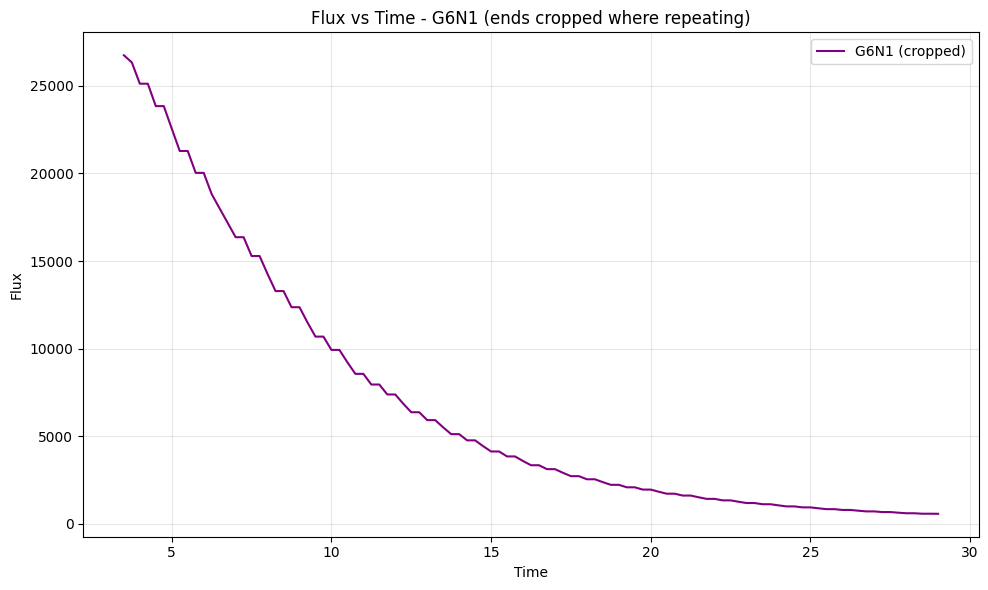


Processing G6N2 - original rows: 118
Cropped G6N2: removed 13 points from start, 2 from end
New rows: 103 (time: 3.50 → 29.50)
Saved cropped plot → plots/G6N2_cropped.png


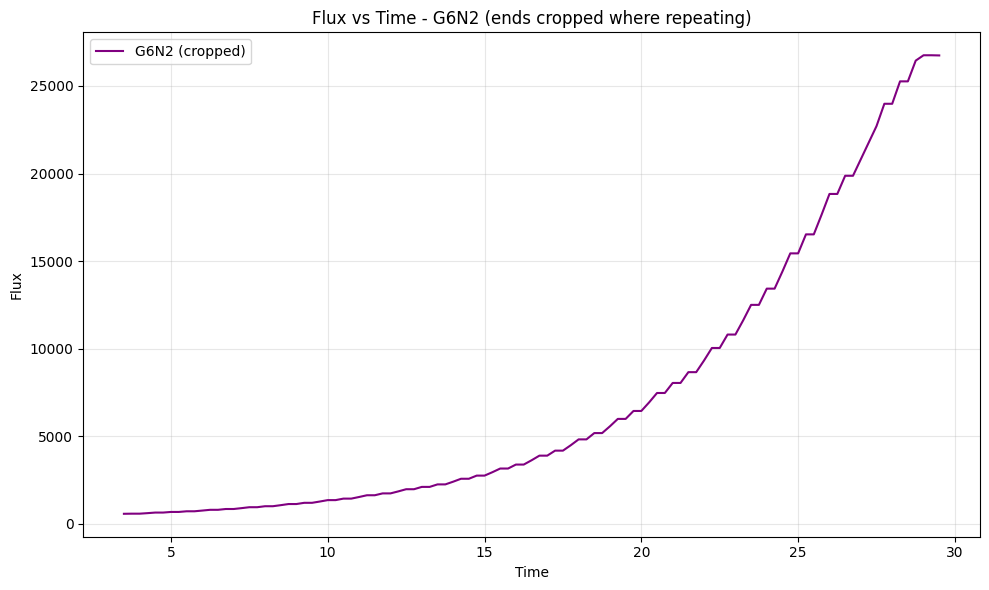


Cropping completed.



In [6]:
def crop_repeated_ends_and_plot(
    clean_data_dict,
    keys_to_process,
    output_dict,
    tolerance=1.0,
    plots_dir="plots",
    save_plots=True,
    show_plots=True
):
    """
    Crops leading and trailing sequences of nearly repeated flux values
    for each key in keys_to_process, stores cropped DataFrames in output_dict,
    and optionally creates/saves plots.

    Parameters:
    -----------
    clean_data_dict : dict
        Dictionary with original cleaned DataFrames (key → pd.DataFrame)
    keys_to_process : list[str]
        List of keys you want to process (e.g. g6_keys, g5_keys, ...)
    output_dict : dict
        Dictionary where cropped DataFrames will be stored (can be empty or pre-existing)
    tolerance : float, default 1.0
        Maximum absolute difference to consider values "repeated"
    plots_dir : str, default "plots"
        Directory where plots will be saved
    save_plots : bool, default True
        Whether to save the cropped plots as PNG
    show_plots : bool, default True
        Whether to call plt.show() after each plot

    Returns:
    --------
    None (modifies output_dict in place)
    """

    for key in keys_to_process:
        if key not in clean_data_dict:
            print(f"Warning: Key '{key}' not found in clean_data_dict → skipping")
            continue

        df = clean_data_dict[key].copy()
        print(f"\nProcessing {key} - original rows: {len(df)}")

        # ── Crop leading near-repeated values ──
        crop_start_idx = 0
        while crop_start_idx < len(df) - 1:
            diff = abs(df['flux'].iloc[crop_start_idx] - df['flux'].iloc[crop_start_idx + 1])
            if diff <= tolerance:
                crop_start_idx += 1
            else:
                break

        # ── Crop trailing near-repeated values ──
        crop_end_idx = len(df) - 1
        while crop_end_idx > 0:
            diff = abs(df['flux'].iloc[crop_end_idx] - df['flux'].iloc[crop_end_idx - 1])
            if diff <= tolerance:
                crop_end_idx -= 1
            else:
                break

        # Protect against fully constant dataset
        if crop_start_idx > crop_end_idx:
            crop_start_idx = 0
            crop_end_idx = 0

        # Apply crop
        df_cropped = df.iloc[crop_start_idx : crop_end_idx + 1].reset_index(drop=True)

        removed_start = crop_start_idx
        removed_end = len(df) - (crop_end_idx + 1)
        print(f"Cropped {key}: removed {removed_start} points from start, {removed_end} from end")
        print(f"New rows: {len(df_cropped)}", end="")
        if 'time' in df_cropped.columns and len(df_cropped) > 0:
            print(f" (time: {df_cropped['time'].iloc[0]:.2f} → {df_cropped['time'].iloc[-1]:.2f})")
        else:
            print()

        # Store result
        output_dict[key] = df_cropped

        # ── Plot ──
        plt.figure(figsize=(10, 6))
        plt.plot(df_cropped['time'], df_cropped['flux'], label=f'{key} (cropped)', color='purple')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(f'Flux vs Time - {key} (ends cropped where repeating)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()

        if save_plots:
            cropped_png_path = os.path.join(plots_dir, f'{key}_cropped.png')
            plt.savefig(cropped_png_path, dpi=300, bbox_inches='tight')
            print(f"Saved cropped plot → {cropped_png_path}")

        if show_plots:
            plt.show()
        else:
            plt.close()

    print("\nCropping completed.\n")

# 1. For G6 
cropped_data_g6_dict = {}
crop_repeated_ends_and_plot(
    clean_data_dict=clean_data_dict,
    keys_to_process=g6_keys,
    output_dict=cropped_data_g6_dict
)


Mapping time → position (1252 mm total)
──────────────────────────────────────────────────
G6N1:
  Time: 3.500 → 29.000 s  |  Duration: 25.500 s
  Velocity: 49.098 mm/s
  Forward direction (N1/N3 style)
G6N2:
  Time: 3.500 → 29.500 s  |  Duration: 26.000 s
  Velocity: 48.154 mm/s
  Direction reversed (N2/N4 style)
Average velocity across runs: 48.626 mm/s
Saved → plots/G6N_flux_vs_position.png


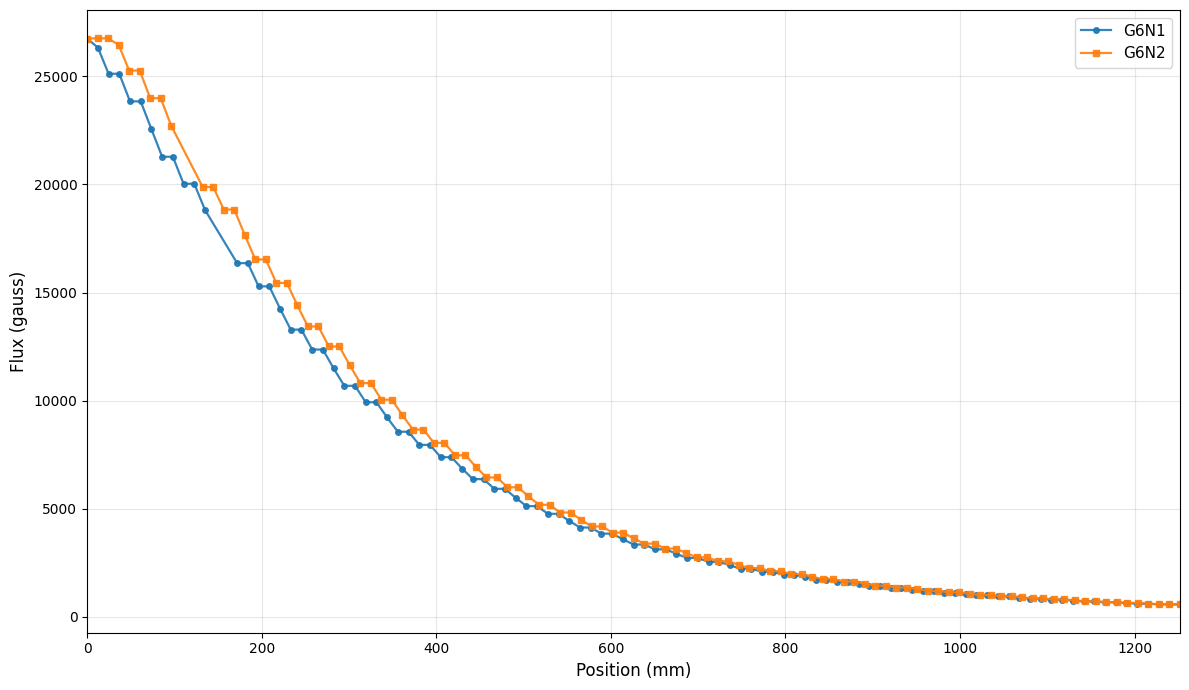

Mapping completed.



In [7]:
def map_time_to_position_and_plot(
    cropped_data_dict,
    keys_to_process,
    initial_pos=0.0,
    final_pos=1252.0,
    output_dict=None,
    velocities_dict=None,
    plots_dir="plots",
    save_plot=False,           
    show_plot=True,
    filename_suffix="_flux_vs_position.png"
):
    """
    Maps time → position using average velocity.
    Reverses direction for keys ending with 'N2' or 'N4'.
    Creates a clean combined plot without title.
    """
    total_distance = final_pos - initial_pos

    if output_dict is None:
        output_dict = {}
    if velocities_dict is None:
        velocities_dict = {}

    print(f"\nMapping time → position ({total_distance} mm total)")
    print("─" * 50)

    for key in keys_to_process:
        if key not in cropped_data_dict:
            print(f"  Warning: '{key}' not found → skipped")
            continue

        df = cropped_data_dict[key].copy()

        if len(df) < 2:
            print(f"  {key}: Too few points (n={len(df)}) → skipped")
            continue

        t_start = df['time'].iloc[0]
        t_end = df['time'].iloc[-1]
        time_span = t_end - t_start

        if time_span <= 0:
            print(f"  {key}: Invalid time span → skipped")
            continue

        v_avg = total_distance / time_span
        velocities_dict[key] = v_avg

        print(f"{key}:")
        print(f"  Time: {t_start:.3f} → {t_end:.3f} s  |  Duration: {time_span:.3f} s")
        print(f"  Velocity: {v_avg:.3f} mm/s")

        # Base mapping (forward direction)
        t0 = df['time'].iloc[0]
        df['position'] = initial_pos + (df['time'] - t0) * v_avg

        # Reverse for N2 and N4 runs
        key_upper = key.upper()
        if 'N2' in key_upper or 'N4' in key_upper:
            df['position'] = final_pos - (df['position'] - initial_pos)
            print(f"  Direction reversed (N2/N4 style)")
        else:
            print(f"  Forward direction (N1/N3 style)")

        output_dict[key] = df

    # Average velocity if we have multiple runs
    vs = [v for k, v in velocities_dict.items() if k in keys_to_process]
    if len(vs) > 1:
        velocities_dict['average'] = np.mean(vs)
        print(f"Average velocity across runs: {velocities_dict['average']:.3f} mm/s")

    # ── Minimal combined plot  ──
    plt.figure(figsize=(12, 7))

    # Simple color/marker cycle
    styles = [
        {'color': 'tab:blue',   'marker': 'o', 'label': 'N1'},
        {'color': 'tab:orange', 'marker': 's', 'label': 'N2'},
        {'color': 'tab:green',  'marker': '^', 'label': 'N3'},
        {'color': 'tab:red',    'marker': 'D', 'label': 'N4'},
    ]

    for i, key in enumerate(keys_to_process):
        if key not in output_dict:
            continue
        df = output_dict[key]

        style = styles[i % len(styles)]
        plt.plot(
            df['position'],
            df['flux'],
            label=key,
            color=style['color'],
            marker=style['marker'],
            markersize=4,
            linewidth=1.6,
            alpha=0.9
        )

    plt.xlabel('Position (mm)', fontsize=12)
    plt.ylabel('Flux (gauss)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11, loc='best')
    plt.xlim(initial_pos, final_pos)
    plt.tight_layout()

    if save_plot:
        os.makedirs(plots_dir, exist_ok=True)
        # Use first key prefix for filename
        prefix = keys_to_process[0][:3] if keys_to_process else "run"
        plot_path = os.path.join(plots_dir, f"{prefix}{filename_suffix}")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Saved → {plot_path}")

    if show_plot:
        plt.show()
    else:
        plt.close()

    print("Mapping completed.\n")
    return output_dict, velocities_dict

# For G6 
mapped_data_g6_dict = {}
velocities_g6 = {}

mapped_data_g6_dict, velocities_g6 = map_time_to_position_and_plot(
    cropped_data_dict=cropped_data_g6_dict,
    keys_to_process=g6_keys,
    initial_pos=0,
    final_pos=1252,
    output_dict=mapped_data_g6_dict,
    velocities_dict=velocities_g6,
    plots_dir="plots",
    save_plot=True,
    show_plot=True,
)

In [8]:
# Compute a physically meaningful tolerance based on sampling interval

sampling_interval = 0.25  # seconds

avg_velocity = velocities_g6['average']
distance_per_sample = avg_velocity * sampling_interval

# Conservative tolerance: covers about 1 full sample interval with margin
tolerance = distance_per_sample

print(f"Average velocity: {avg_velocity:.2f} mm/s")
print(f"Distance traveled in one sample (0.25 s): {distance_per_sample:.2f} mm")
print(f"Recommended tolerance: ±{tolerance:.2f} mm")

Average velocity: 48.63 mm/s
Distance traveled in one sample (0.25 s): 12.16 mm
Recommended tolerance: ±12.16 mm


Found 100 matched positions within ±12.156485671191554 mm (reference: G6N1, 101 total points)


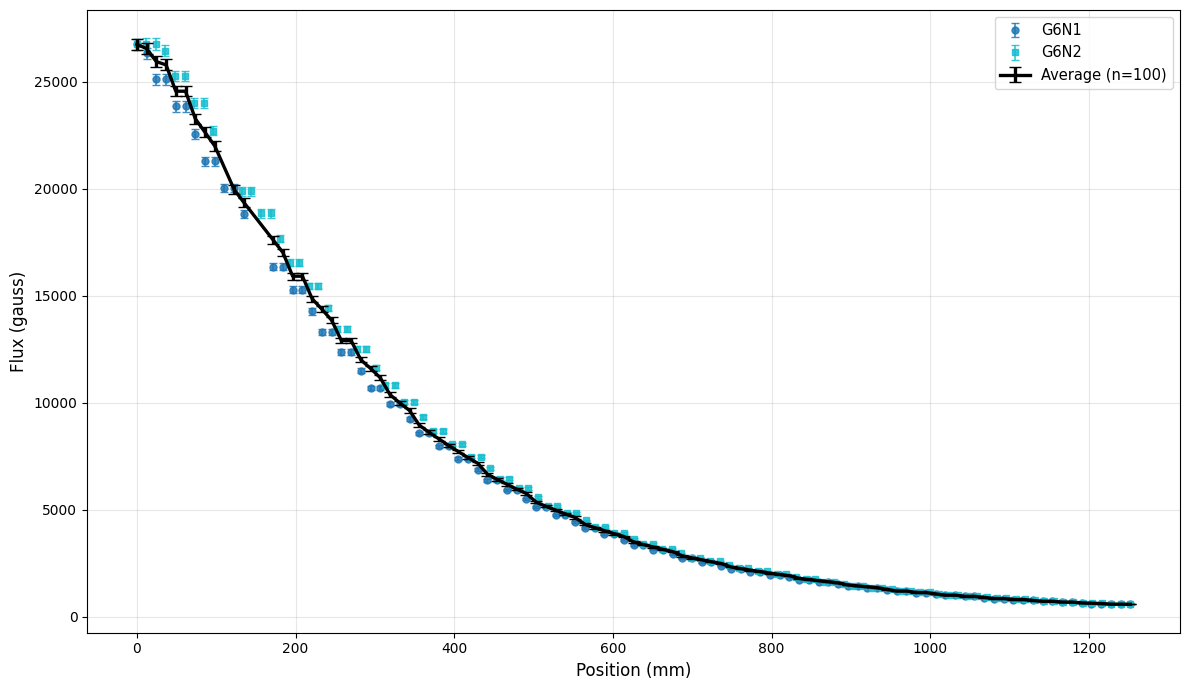

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_matched_flux_with_average(
    mapped_data_dict,
    keys_to_process,
    tolerance=tolerance,               # mm
    error_func=None,             # function to compute y-error
    plots_dir="plots",
    save_plot=False,
    show_plot=True,
    filename_prefix="matched_flux",
    figsize=(12, 7)
):
    """
    Plots individual runs as points (no lines) + average line on matched positions only.
    Handles any number of keys (N1,N2,N3,N4,...).
    Reverses direction assumed already done in mapped_data_dict.

    Parameters:
    -----------
    mapped_data_dict : dict
        Dict containing DataFrames with 'position' and 'flux' columns
    keys_to_process : list[str]
        Keys to include in the plot (e.g. ['G6N1', 'G6N2'] or ['00N1','00N2','00N3','00N4'])
    tolerance : float, default 0.5
        Maximum position difference (mm) to consider two points matched
    error_func : callable, optional
        Function that takes flux array and returns error array
        Default: ±1% of |flux| + 1 Gauss
    save_plot, show_plot : bool
    filename_prefix : str
        Used when saving (prefix + '_' + first_key + '.png')

    Returns:
    --------
    dict with keys: 'matched_pos', 'avg_flux', 'yerr_avg', 'individual_data'
    """
    if error_func is None:
        def error_func(flux_values):
            return 0.01 * np.abs(flux_values) + 1.0

    # ── Find matched positions across ALL provided keys ──
    # We'll use the first key as reference, then match others to it
    ref_key = keys_to_process[0]
    if ref_key not in mapped_data_dict:
        raise ValueError(f"Reference key '{ref_key}' not found in mapped_data_dict")

    df_ref = mapped_data_dict[ref_key]
    pos_ref = df_ref['position'].values
    flux_ref = df_ref['flux'].values

    matched_pos = []
    matched_fluxes = {key: [] for key in keys_to_process}  # list for each run

    for p_ref, f_ref in zip(pos_ref, flux_ref):
        is_matched = True
        fluxes_here = [f_ref]

        for key in keys_to_process[1:]:  # compare others to reference
            if key not in mapped_data_dict:
                continue
            df = mapped_data_dict[key]
            pos_other = df['position'].values
            flux_other = df['flux'].values

            close_idx = np.where(np.abs(pos_other - p_ref) <= tolerance)[0]
            if len(close_idx) == 0:
                is_matched = False
                break

            # take closest
            idx = close_idx[np.argmin(np.abs(pos_other[close_idx] - p_ref))]
            fluxes_here.append(flux_other[idx])

        if is_matched and len(fluxes_here) == len(keys_to_process):
            matched_pos.append(p_ref)
            for i, key in enumerate(keys_to_process):
                matched_fluxes[key].append(fluxes_here[i])

    # Convert to arrays
    matched_pos = np.array(matched_pos)
    for key in matched_fluxes:
        matched_fluxes[key] = np.array(matched_fluxes[key])

    # Average flux on matched positions
    if len(matched_pos) > 0:
        all_matched_flux = np.stack([matched_fluxes[k] for k in keys_to_process], axis=0)
        matched_flux_avg = np.mean(all_matched_flux, axis=0)
        yerr_avg = error_func(matched_flux_avg)
    else:
        matched_flux_avg = np.array([])
        yerr_avg = np.array([])

    n_matched = len(matched_pos)
    n_total_ref = len(pos_ref)
    print(f"Found {n_matched} matched positions within ±{tolerance} mm "
          f"(reference: {ref_key}, {n_total_ref} total points)")

    # ── Plotting ────────────────────────────────────────────────────────────────
    plt.figure(figsize=figsize)

    # Style cycle for multiple runs
    markers = ['o', 's', '^', 'D', 'v', '<', '>']
    colors = plt.cm.tab10(np.linspace(0, 0.95, len(keys_to_process)))

    for i, key in enumerate(keys_to_process):
        if key not in mapped_data_dict:
            continue

        df = mapped_data_dict[key]
        pos = df['position'].values
        flux = df['flux'].values
        yerr = error_func(flux)

        plt.errorbar(
            pos, flux, yerr=yerr,
            label=key,
            marker=markers[i % len(markers)],
            markersize=5,
            linestyle='',
            capsize=3,
            color=colors[i],
            alpha=0.85,
            elinewidth=1.2
        )

    # Average - line only
    if n_matched > 0:
        plt.errorbar(
            matched_pos, matched_flux_avg, yerr=yerr_avg,
            label=f'Average (n={n_matched})',
            color='black',
            linewidth=2.4,
            linestyle='-',
            marker='',
            capsize=4,
            alpha=1.0,
            zorder=10
        )

    plt.xlabel('Position (mm)', fontsize=12)
    plt.ylabel('Flux (gauss)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10.5, loc='best')
    plt.tight_layout()

    if save_plot:
        os.makedirs(plots_dir, exist_ok=True)
        fname = f"{filename_prefix}_{keys_to_process[0][:5]}.png"
        save_path = os.path.join(plots_dir, fname)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {save_path}")

    if show_plot:
        plt.show()
    else:
        plt.close()

    data = {
        'matched_pos': matched_pos,
        'avg_flux': matched_flux_avg,
        'yerr_avg': yerr_avg
    }
    df = pd.DataFrame(data)
        #'individual_data': matched_fluxes
     # Return useful data for further analysis if needed
    return df

results = {}
results['G6'] = plot_matched_flux_with_average(
    mapped_data_dict=mapped_data_g6_dict,
    keys_to_process=g6_keys,
    save_plot=False,
    show_plot=True
)

let's try to recreate this average line for all plots so I can get an estimation on BgradB on each coordinate

## Obtain this kind of plot for each set in coordinates

In [10]:
# For all data
cropped_data_dict = {}
crop_repeated_ends_and_plot(
    clean_data_dict=clean_data_dict,
    keys_to_process=sorted_keys,
    output_dict=cropped_data_dict,
    tolerance=2,
    save_plots=False,
    show_plots=False
)

mapped_data_dict = {}
mapped_data_dict, velocities = map_time_to_position_and_plot(
    cropped_data_dict=cropped_data_dict,
    keys_to_process=sorted_keys,
    initial_pos=0,
    final_pos=1252,
    output_dict=mapped_data_dict,
    save_plot=False,
    show_plot=False,
)


Processing 00N1 - original rows: 119
Cropped 00N1: removed 9 points from start, 8 from end
New rows: 102 (time: 2.50 → 28.00)

Processing 00N2 - original rows: 119
Cropped 00N2: removed 6 points from start, 12 from end
New rows: 101 (time: 1.75 → 27.00)

Processing 00N3 - original rows: 118
Cropped 00N3: removed 11 points from start, 23 from end
New rows: 84 (time: 3.00 → 24.25)

Processing 00N4 - original rows: 118
Cropped 00N4: removed 11 points from start, 16 from end
New rows: 91 (time: 3.00 → 26.00)

Processing A3N1 - original rows: 118
Cropped A3N1: removed 13 points from start, 4 from end
New rows: 101 (time: 3.50 → 29.00)

Processing A3N2 - original rows: 118
Cropped A3N2: removed 13 points from start, 0 from end
New rows: 105 (time: 3.50 → 30.00)

Processing A6N1 - original rows: 118
Cropped A6N1: removed 9 points from start, 7 from end
New rows: 102 (time: 2.75 → 28.25)

Processing A6N2 - original rows: 118
Cropped A6N2: removed 13 points from start, 2 from end
New rows: 103

Found 99 matched positions within ±12.156485671191554 mm (reference: 00N1, 102 total points)


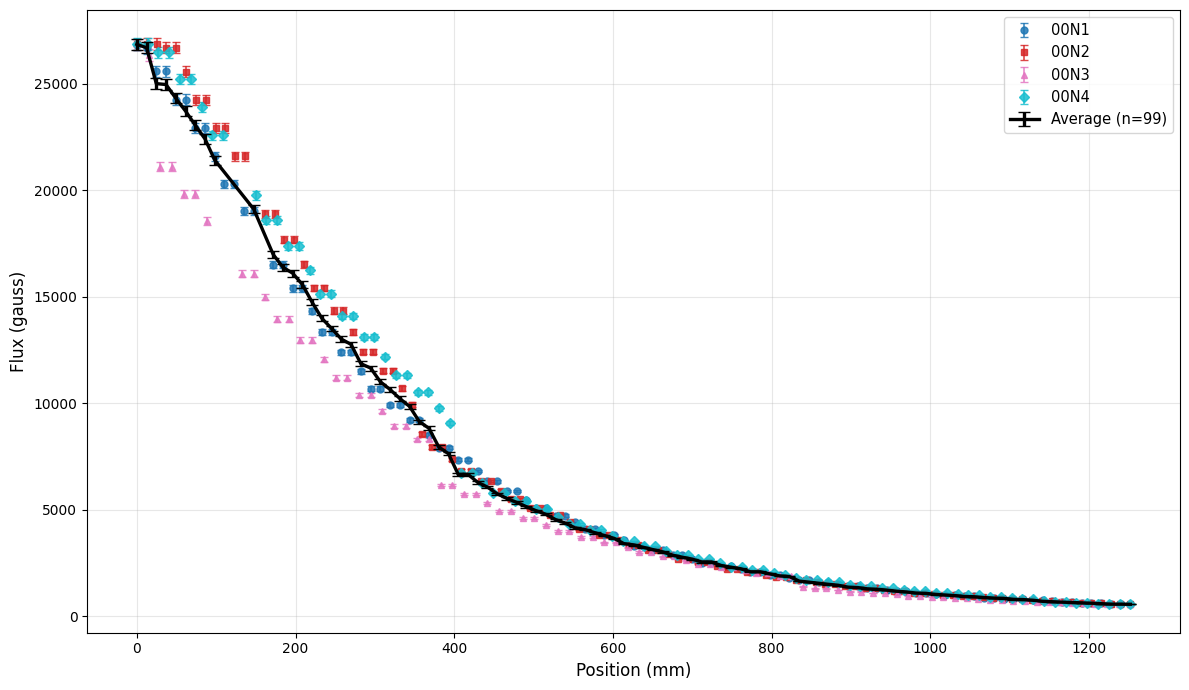

Found 100 matched positions within ±12.156485671191554 mm (reference: A3N1, 101 total points)


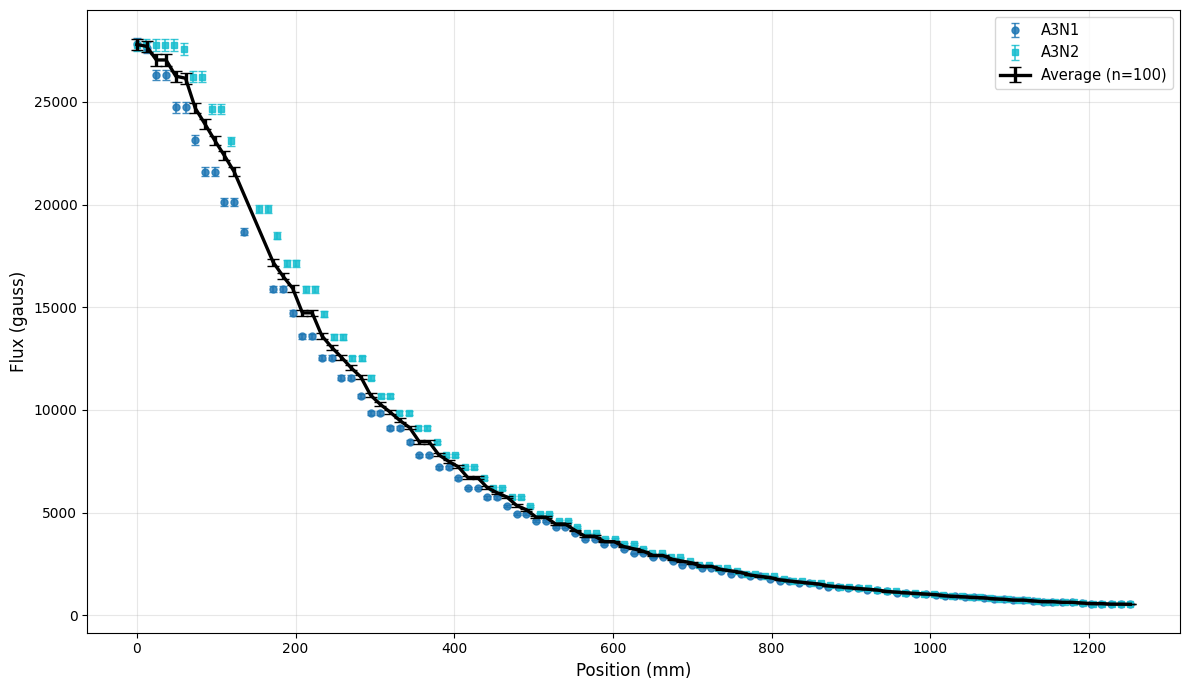

Found 101 matched positions within ±12.156485671191554 mm (reference: A6N1, 102 total points)


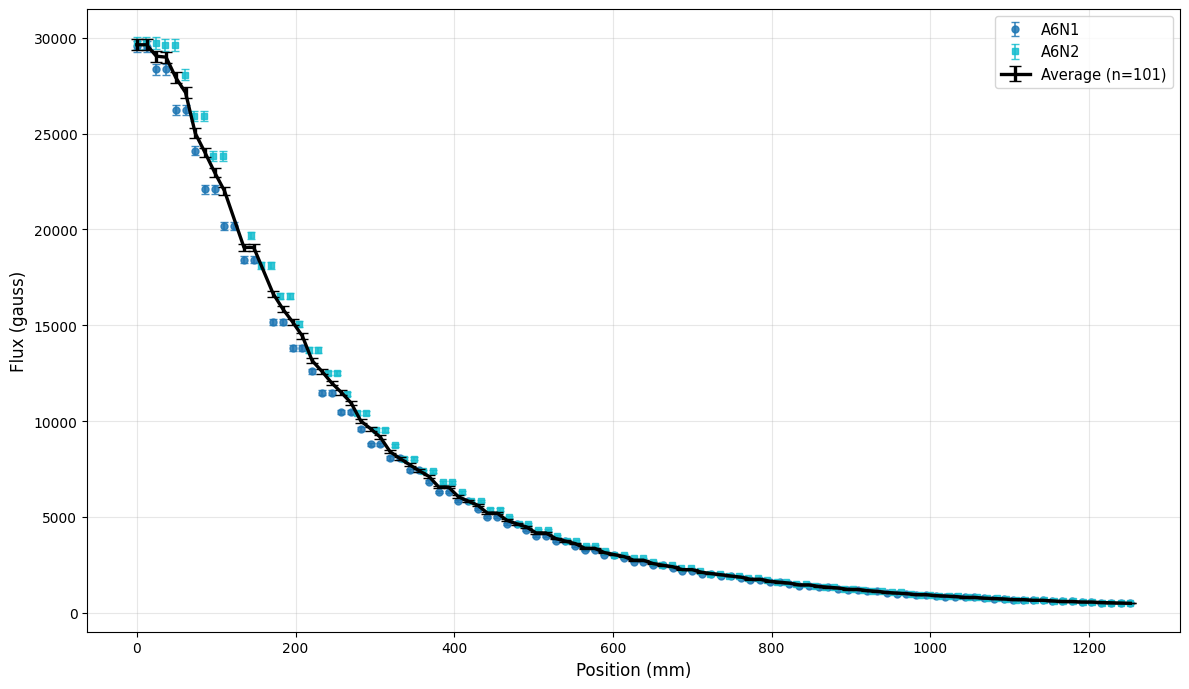

Found 101 matched positions within ±12.156485671191554 mm (reference: D3N1, 101 total points)


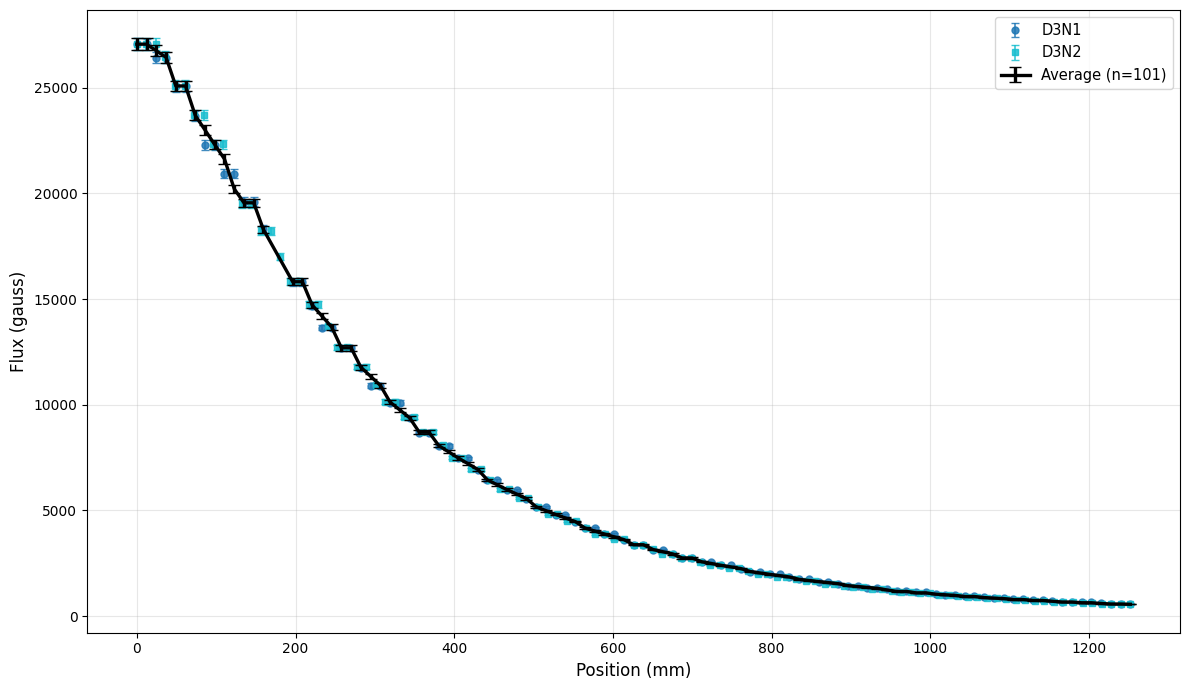

Found 99 matched positions within ±12.156485671191554 mm (reference: G3N1, 100 total points)


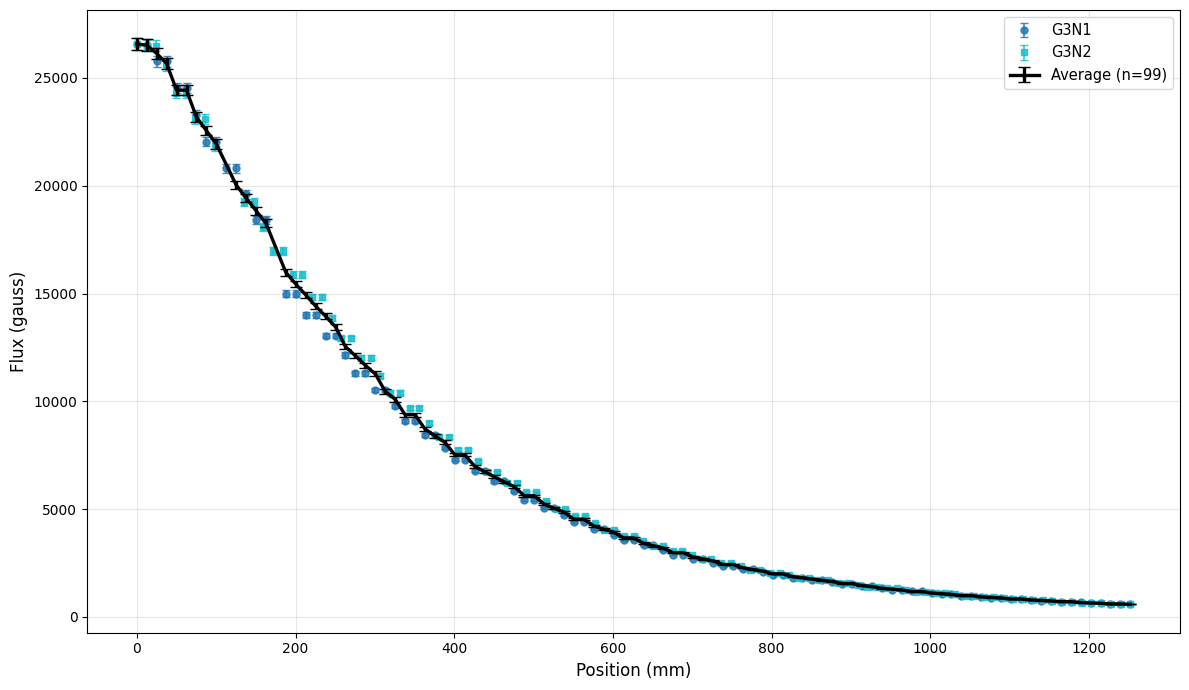

Found 100 matched positions within ±12.156485671191554 mm (reference: G6N1, 101 total points)


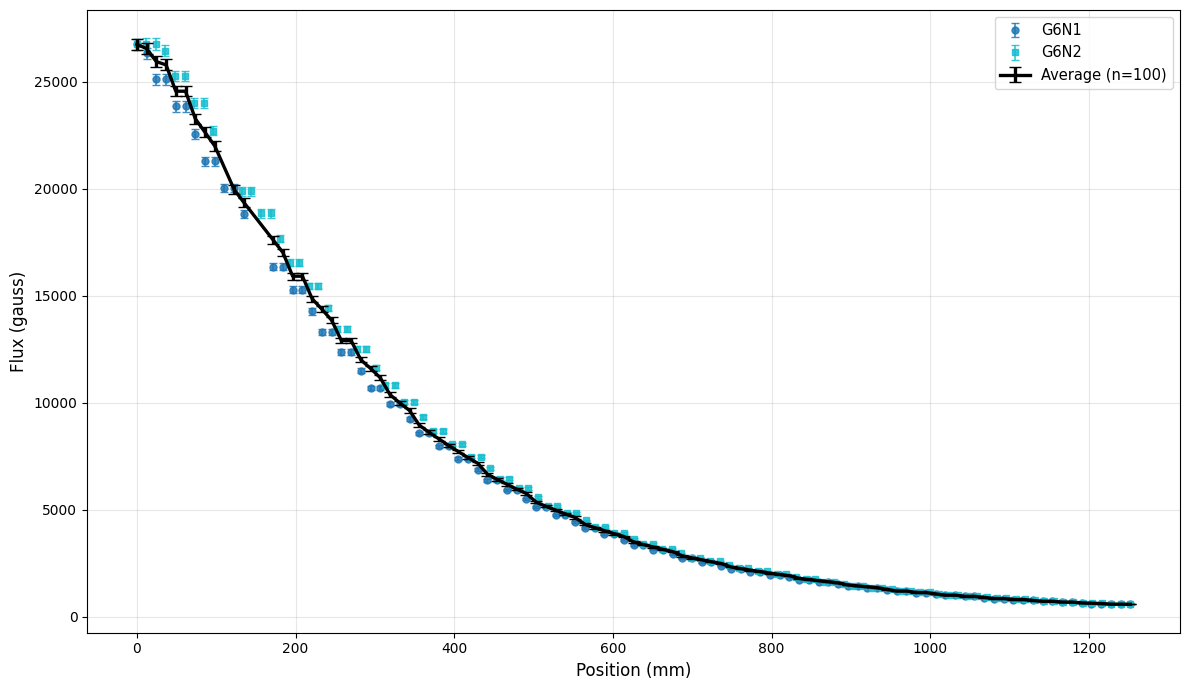

In [12]:
results = {
    base: plot_matched_flux_with_average(
        mapped_data_dict=mapped_data_dict,
        keys_to_process=[k for k in sorted_keys if k.startswith(base)],
        save_plot=False,
        show_plot=True
    )
    for base in prefixes #from the beginning 
}

from here results dict contains dfs for each coordinate, each df has the matched position and the avg flux of both measurements.
I would like to find B gradB for each coordinate by using central difference approximation but this time the separation between measured points is to wide, that about of 12mm

I'm thinking maybe a fit can give the gradB more easily but I'm uncertain as to which form to fit, earlier I did an exponential to get rid of some outliers, but I'm not so sure it gives a valuable physical meaning this time.



## Find gradB and BgradB

In both Gauss/mm and Tesla/m for later use

In [30]:
results['00']

,matched_pos,avg_flux,yerr_avg
0,0.000000,26838.500,269.38500
1,12.274510,26679.250,267.79250
2,24.549020,24996.500,250.96500
3,36.823529,24953.750,250.53750
4,49.098039,24309.000,244.09000
...,...,...,...
94,1202.901961,620.125,7.20125
95,1215.176471,597.875,6.97875
96,1227.450980,576.350,6.76350
97,1239.725490,576.350,6.76350


In [13]:
from scipy.interpolate import UnivariateSpline

# Each DF has 'matched_pos' (in mm), 'avg_flux', 'yerr_avg'

grad_results = {}  # To store DFs with added gradient column

for key, df in results.items():
    # Extract data (sort by position just in case)
    df = df.sort_values('matched_pos')
    x = df['matched_pos'].values  # positions
    y = df['avg_flux'].values     # flux values
    yerr = df['yerr_avg'].values  # errors, for potential use
            
    # Tune 's' based on total variance or yerr: s ~ sum(yerr**2) or smaller for less smoothing
    # Here, rough guess: s = len(y) * np.mean(yerr)**2  # chi^2 ~ len(y)
    s_factor = len(y) * np.mean(yerr)**2
    spl = UnivariateSpline(x, y, s=s_factor, k=3)  # cubic spline
    
    # Get derivative function
    dspl = spl.derivative(n=1)
    
    # Compute dB/dx at original positions
    grad = dspl(x)
    abs_grad = np.abs(grad)
    
    # Add to DF
    df['dB_dx'] = abs_grad  # units: flux_units / position_units
    df['BgradB'] = y * abs_grad  # units: flux_units_squared / position_units

    print(f"Processed {key}: max |dB/dx| = {np.max(abs_grad):.2f}, at pos {x[np.argmax(abs_grad)]:.2f} mm")
    
    # Store
    grad_results[key] = df

Processed 00: max |dB/dx| = 138.67, at pos 0.00 mm
Processed A3: max |dB/dx| = 99.07, at pos 73.65 mm
Processed A6: max |dB/dx| = 131.99, at pos 73.65 mm
Processed D3: max |dB/dx| = 116.11, at pos 159.57 mm
Processed G3: max |dB/dx| = 76.91, at pos 75.12 mm
Processed G6: max |dB/dx| = 77.11, at pos 73.65 mm


In [14]:
grad_results_central = {}

for key, df in results.items():
    # Make sure data is sorted by position
    df = df.sort_values('matched_pos').copy()
    x = df['matched_pos'].values      # in mm
    y = df['avg_flux'].values         # flux
    yerr = df['yerr_avg'].values      # optional: error propagation

    # Compute gradient using central difference (interior points)
    # dy/dx ≈ (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    grad = np.full_like(y, np.nan, dtype=float)  # initialize with NaN

    # Interior points
    dx = x[2:] - x[:-2]                  # can be variable spacing
    dy = y[2:] - y[:-2]
    grad[1:-1] = dy / dx

    # NaN at edges
    grad[0] = np.nan
    grad[-1] = np.nan

    abs_grad = np.abs(grad)

    # Add to dataframe
    df['dB_dx'] = abs_grad
    df['BgradB'] = y * abs_grad   # |B|·|dB/dx|

    # Useful diagnostics
    max_idx = np.nanargmax(abs_grad)
    print(f"{key}  central diff → max |dB/dx| = {abs_grad[max_idx]:.2f}  "
          f"at pos = {x[max_idx]:.2f} mm   (flux = {y[max_idx]:.0f})")

    grad_results_central[key] = df

00  central diff → max |dB/dx| = 75.03  at pos = 12.27 mm   (flux = 26679)
A3  central diff → max |dB/dx| = 91.04  at pos = 73.65 mm   (flux = 24690)
A6  central diff → max |dB/dx| = 127.60  at pos = 73.65 mm   (flux = 25014)
D3  central diff → max |dB/dx| = 85.15  at pos = 110.47 mm   (flux = 21626)
G3  central diff → max |dB/dx| = 76.22  at pos = 162.76 mm   (flux = 18258)
G6  central diff → max |dB/dx| = 78.19  at pos = 73.65 mm   (flux = 23268)


In [15]:
from scipy.signal import savgol_filter

grad_results_savgol = {}

for key, df in results.items():
    # Make sure data is sorted by position
    df = df.sort_values('matched_pos').copy()
    x = df['matched_pos'].values      # in mm
    y = df['avg_flux'].values         # flux
    yerr = df['yerr_avg'].values      # optional: error propagation


    # Inside the loop, after getting x & y:
    window_length = 9    # odd number, tune according to your data density
    polyorder = 3
    
    # smoothed flux
    y_smooth = savgol_filter(y, window_length=window_length, polyorder=polyorder)
    
    # gradient from smoothed data (still central diff inside)
    grad_sg = np.gradient(y_smooth, x, edge_order=2)
    
    # or even better: savgol also gives derivative directly
    grad_sg = savgol_filter(y, window_length=window_length, polyorder=polyorder, deriv=1, delta=np.mean(np.diff(x)))
    
    abs_grad_sg = np.abs(grad_sg)
    
    df['dB_dx'] = abs_grad_sg
    df['BgradB'] = y * abs_grad_sg

    max_idx = np.nanargmax(abs_grad)
    print(f"{key}  savgol max |dB/dx| = {abs_grad[max_idx]:.2f}  "
          f"at pos = {x[max_idx]:.2f} mm   (flux = {y[max_idx]:.0f})")

    grad_results_savgol[key] = df

00  savgol max |dB/dx| = 78.19  at pos = 73.65 mm   (flux = 23045)
A3  savgol max |dB/dx| = 78.19  at pos = 73.65 mm   (flux = 24690)
A6  savgol max |dB/dx| = 78.19  at pos = 73.65 mm   (flux = 25014)
D3  savgol max |dB/dx| = 78.19  at pos = 73.65 mm   (flux = 23692)
G3  savgol max |dB/dx| = 78.19  at pos = 75.12 mm   (flux = 23184)
G6  savgol max |dB/dx| = 78.19  at pos = 73.65 mm   (flux = 23268)


In [16]:
# Conversion factors
GAUSS_TO_TESLA = 1 / 10000  # 1 T = 10,000 Gauss
MM_TO_M = 1 / 1000         # for position if needed, but we keep x in mm for readability

# But for gradient: original dB/dx is in Gauss/mm
# To get T/m: (Gauss/mm) * (1 T / 10000 Gauss) * (1000 mm / 1 m) = value * 1000 / 10000 = value * 0.1
GRADIENT_CONVERSION = GAUSS_TO_TESLA / MM_TO_M #0.1  # Gauss/mm → T/m

# For product B0 * dB/dx:
# (Gauss) * (Gauss/mm) → T * (T/m) after conversion
# So: value_in_Gauss * value_in_Gauss_per_mm * (1/10000) * (0.1) = value * 0.00001
PRODUCT_CONVERSION = GAUSS_TO_TESLA * GRADIENT_CONVERSION  # = 1e-5

In [17]:
allresults = [
    ("spline",   grad_results),
    ("central",  grad_results_central),
    ("savgol",   grad_results_savgol),
]
grad_results_SIunits = {}
for method_name, results_dict in allresults:
    for key, df in results_dict.items():
        df_si = df.copy()
        
        df_si['B_avg_T']     = df['avg_flux']     * GAUSS_TO_TESLA
        df_si['B_err_T']     = df['yerr_avg']     * GAUSS_TO_TESLA
        df_si['dB_dx_Tm']    = df['dB_dx']        * GRADIENT_CONVERSION
        df_si['B_gradB_T2m'] = df['BgradB']       * PRODUCT_CONVERSION   # or: df_si['B_avg_T'] * df_si['dB_dx_Tm']
        df_si['position_m'] = df['matched_pos'] * MM_TO_M
    
        #error propagation
        df_si['dB_dx_err_Tm'] = df_si['B_err_T'] / (tolerance * MM_TO_M)
        
        df_si['B_gradB_err_T2m'] = np.sqrt(
        (df_si['dB_dx_Tm'] * df_si['B_err_T'])**2 +               # from δB
        (df_si['B_avg_T']  * df_si['dB_dx_err_Tm'])**2            # from δ(dB/dx)
    )
        
        # Drop or rename original columns as desired
        df_si = df_si.drop(columns=['avg_flux', 'yerr_avg', 'dB_dx', 'BgradB'], errors='ignore')

        grad_results_SIunits[key] = df_si

    print(method_name)
    for key, df in sorted(grad_results_SIunits.items()):
        max_row = df.loc[df['B_gradB_T2m'].idxmax()]
        print(f"{key:2s} | max BgradB = {max_row['B_gradB_T2m']:2.3f} ± {max_row['B_gradB_err_T2m']:2.3f} T2/m "
              f" @ {max_row['position_m']:2.3f} ± {(tolerance * MM_TO_M):2.3f} m  (B = {max_row['B_avg_T']:2.3f} ± {max_row['B_err_T']:2.3f} T)")
    print( "-" * 80)

spline
00 | max BgradB = 37.217 ± 5.959 T2/m  @ 0.000 ± 0.012 m  (B = 2.684 ± 0.027 T)
A3 | max BgradB = 24.460 ± 5.041 T2/m  @ 0.074 ± 0.012 m  (B = 2.469 ± 0.025 T)
A6 | max BgradB = 34.528 ± 6.090 T2/m  @ 0.061 ± 0.012 m  (B = 2.714 ± 0.027 T)
D3 | max BgradB = 23.298 ± 4.643 T2/m  @ 0.074 ± 0.012 m  (B = 2.369 ± 0.024 T)
G3 | max BgradB = 18.416 ± 5.445 T2/m  @ 0.038 ± 0.012 m  (B = 2.567 ± 0.026 T)
G6 | max BgradB = 17.943 ± 4.476 T2/m  @ 0.074 ± 0.012 m  (B = 2.327 ± 0.023 T)
--------------------------------------------------------------------------------
central
00 | max BgradB = 20.018 ± 5.881 T2/m  @ 0.012 ± 0.012 m  (B = 2.668 ± 0.027 T)
A3 | max BgradB = 22.479 ± 5.040 T2/m  @ 0.074 ± 0.012 m  (B = 2.469 ± 0.025 T)
A6 | max BgradB = 32.085 ± 6.089 T2/m  @ 0.061 ± 0.012 m  (B = 2.714 ± 0.027 T)
D3 | max BgradB = 20.122 ± 4.641 T2/m  @ 0.074 ± 0.012 m  (B = 2.369 ± 0.024 T)
G3 | max BgradB = 17.468 ± 5.444 T2/m  @ 0.038 ± 0.012 m  (B = 2.567 ± 0.026 T)
G6 | max BgradB = 18.193

Keep only G6 for translational 

# Translational data

First lets import, clean and orgianize the data from the csv into dfs or dicts of dfs

In [18]:
import pandas as pd
import numpy as np

# Read the whole file as text and split
with open('Translational Data taken around G6 - Sheet1.csv', 'r', encoding='utf-8') as f:
    content = f.read()

# Split on the "0 displacement at ... " lines - good section markers
sections = content.split('0 displacement at')

Translational_dfs = {}

for i, section in enumerate(sections):
    if not section.strip():
        continue
        
    lines = section.strip().split('\n')
    
    # Get title / equilibrium condition
    title_line = lines[0].strip().rstrip(',')   # e.g. "1 cm:" or "-.4 cm:"
    condition = title_line.replace('0 displacement at', '').strip().rstrip(':')
    
    # Skip empty/weird first lines and find header
    header_idx = 1
    while header_idx < len(lines) and not ',' in lines[header_idx]:
        header_idx += 1
        
    if header_idx >= len(lines):
        continue
        
    # Try to read this chunk as csv
    try:
        from io import StringIO
        df = pd.read_csv(StringIO('\n'.join(lines[header_idx:])), 
                        skipinitialspace=True,
                        na_values=['', '410.00%'])  # ← catches typo
        
        # Clean column names
        df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)
        
        # Add metadata columns
        df['condition'] = condition
        df['experiment_idx'] = i
        
        # Clean displacement column names (they're inconsistent)
        disp_cols = [c for c in df.columns if 'Displacement' in c]
        for col in disp_cols:
            df = df.rename(columns={col: f'disp_{col.split("N")[1].strip()}'})
            
        Translational_dfs[f'exp_{i:02d}_{condition}'] = df
        
    except Exception as e:
        print(f"Section {i} failed: {e}")
        print("First few lines:\n", '\n'.join(lines[:6]), "\n")

In [19]:
import pandas as pd
import numpy as np

cleaned_materials = {}

for exp_name, df_big in Translational_dfs.items():
    if not isinstance(df_big, pd.DataFrame):
        continue

    # ── Material detection ───────────────────────────────────────
    first_col = str(df_big.columns[0]).lower()
    if 'ti coil' in first_col:
        material = 'Ti_coil'
    elif 'bipolar' in first_col or 'medtronic' in first_col or 'streamline' in first_col:
        material = 'Bipolar_Lead'
    elif 'ti straight' in first_col or 'rod' in first_col:
        material = 'Ti_Rod'
    elif '316l' in first_col or 'stainless' in first_col:
        material = 'SS_316L'
    else:
        print(f"Could not detect material for experiment: {exp_name}")
        continue

    # ── Try to find the condition value (usually in last few columns) ──
    condition_value = np.nan
    condition_candidates = df_big.iloc[0].astype(str).str.lower()

    for idx, val in enumerate(condition_candidates):
        val_str = str(val).strip()
        if 'cm' in val_str and any(c.isdigit() or c in '.-' for c in val_str):
            try:
                # Try to extract number (can be negative)
                num = float(''.join(c for c in val_str if c.isdigit() or c in '.-'))
                if abs(num) < 30:  # reasonable sanity check for cm
                    condition_value = num
                    break
            except:
                pass

    # Fallback: look in exp_name
    if np.isnan(condition_value):
        for part in exp_name.split('_'):
            if 'cm' in part:
                try:
                    condition_value = float(part.replace('cm', '').replace('-.', '-0.'))
                    break
                except:
                    pass

    print(f"{material} ), condition: {condition_value} cm")

    # ── Process trials ────────────────────────────────────────────
    trials = {}
    trial_names = ['N1', 'N2', 'N3']
    col_starts = [0, 2, 4]  # typical starting columns

    for i, trial_name in enumerate(trial_names):
        try:
            pos_col = col_starts[i]
            disp_col = pos_col + 1

            if pos_col >= len(df_big.columns):
                continue

            trial_df = df_big.iloc[1:, [pos_col, disp_col]].copy()
            trial_df.columns = ['Position_from_bore_mm', 'Raw_Displacement_cm']

            # Convert to numeric
            trial_df = trial_df.apply(pd.to_numeric, errors='coerce')

            # Drop completely empty rows
            trial_df = trial_df.dropna(how='all').dropna(subset=['Position_from_bore_mm'])

            if trial_df.empty:
                continue

            # Store condition & corrected displacement
            trial_df = trial_df.assign(
                Condition_cm=condition_value,
                Corrected_Displacement_cm=lambda x: x['Raw_Displacement_cm'] - condition_value
            )

            trials[trial_name] = trial_df.reset_index(drop=True)

        except Exception as e:
            print(f"  Error processing {material} {trial_name}: {e}")

    if trials:
        cleaned_materials[material] = trials
        print(f"  → {len(trials)} trials processed\n")

Ti_coil ), condition: 1.0 cm
  → 3 trials processed

Bipolar_Lead ), condition: -0.4 cm
  → 3 trials processed

Ti_Rod ), condition: 0.1 cm
  → 1 trials processed

SS_316L ), condition: 2.5 cm
  → 1 trials processed



Now we can call on each trial separately as


    cleaned_materials['Ti_coil']['N1']
or 

    cleaned_materials['Bipolar_Lead']['N2']
or 

    cleaned_materials['SS_316L']

In [20]:
# Constants
L = 101.0        # cm - pendulum length
dx = 0.05         # cm - uncertainty in position measurement
dL = 0.05         # cm - uncertainty in length measurement

# Function to compute tan(θ) and its uncertainty
def uncertainty_tan_arcsin(x, dx, L, dL):
    """
    x : horizontal displacement (cm)
    L : pendulum length (cm)
    dx, dL : uncertainties (cm)
    """
    # Avoid division by zero or invalid values
    mask_valid = (x != 0) & (L != 0) & ~np.isnan(x) & ~np.isnan(L)
    
    theta = np.full_like(x, np.nan, dtype=float)
    tan_theta = np.full_like(x, np.nan, dtype=float)
    dtan_theta = np.full_like(x, np.nan, dtype=float)
    
    valid = mask_valid
    
    theta[valid] = np.arctan(x[valid] / L)
    tan_theta[valid] = np.tan(theta[valid])
    
    # Partial derivatives (only for valid points)
    sqrt_term = np.sqrt(1 - (x[valid] / L)**2)
    
    dtheta_dx = 1 / (L * sqrt_term)
    dtheta_dL = -x[valid] / (L**2 * sqrt_term)
    
    dtan_dtheta = 1 / np.cos(theta[valid])**2
    
    dtan_dx = dtan_dtheta * dtheta_dx * dx
    dtan_dL = dtan_dtheta * dtheta_dL * dL
    
    dtan_theta[valid] = np.sqrt(dtan_dx**2 + dtan_dL**2)
    
    return tan_theta, dtan_theta


# Apply to every trial of every material
for material, trials_dict in cleaned_materials.items():
    print(f"\nProcessing material: {material}")
    
    for trial_name, df in trials_dict.items():
        # Work on a copy to avoid modifying original data
        df = df.copy()
        
        # Make sure we have the correct column name
        # Adjust name if you used 'Position_from_bore_mm' or similar
        pos_col = 'Corrected_Displacement_cm'  
        
        if pos_col not in df.columns:
            print(f"  Warning: '{pos_col}' not found in {material} {trial_name}")
            continue
        
        # Calculate deflection angle and tan(theta)
        x = df[pos_col].values  # horizontal displacement in cm
        
        tan_theta, tan_theta_unc = uncertainty_tan_arcsin(x, dx, L, dL)
        
        # Add new columns
        df['tan_theta'] = tan_theta
        df['tan_theta_std'] = tan_theta_unc
        
        # Update the dictionary with the enhanced dataframe
        trials_dict[trial_name] = df
        print(f"  {trial_name:3}  added tan_theta & uncertainty  (rows: {len(df)})")
        #print(df[[pos_col, 'tan_theta', 'tan_theta_std']].tail(3))


Processing material: Ti_coil
  N1   added tan_theta & uncertainty  (rows: 11)
  N2   added tan_theta & uncertainty  (rows: 11)
  N3   added tan_theta & uncertainty  (rows: 11)

Processing material: Bipolar_Lead
  N1   added tan_theta & uncertainty  (rows: 11)
  N2   added tan_theta & uncertainty  (rows: 11)
  N3   added tan_theta & uncertainty  (rows: 11)

Processing material: Ti_Rod
  N1   added tan_theta & uncertainty  (rows: 10)

Processing material: SS_316L
  N1   added tan_theta & uncertainty  (rows: 11)


In [21]:
def match_to_nearest_position(defl_df, grad_df, pos_col='Position_from_bore_mm', tolerance_mm=15):
    """
    For each row in defl_df, find the closest position in grad_df.
    Adds columns: matched_pos, TmB_gradB, err_TmB_gradB, distance_mm
    """
    matched = []
    
    for _, row in defl_df.iterrows():
        pos = row[pos_col]
        
        # Find closest
        distances = np.abs(grad_df['matched_pos'] - pos)
        idx_closest = distances.idxmin()
        dist = distances[idx_closest]
        
        if dist > tolerance_mm:
            # Too far → mark as unmatched
            match_row = {
                'matched_pos': np.nan,
                'B_gradB_T2m': np.nan,
                'B_gradB_err_T2m': np.nan,
                'distance_mm': dist
            }
        else:
            match_row = grad_df.loc[idx_closest, 
                                    ['matched_pos', 'B_gradB_T2m', 'B_gradB_err_T2m']].to_dict()
            match_row['distance_mm'] = dist
        
        matched.append(match_row)
    
    return pd.DataFrame(matched)

In [22]:
POS_COL = 'Position_from_bore_mm'          
TOL_MM = 5                                

for material, trials_dict in cleaned_materials.items():
    print(f"\n{'='*60}\n{material.upper()}")
    
    # We'll collect new matched dataframes here
    new_entries = {}
    
    for trial_name, df_orig in trials_dict.items():
        # Skip already matched versions to avoid double-processing
        if trial_name.endswith('_matched'):
            continue
            
        df = df_orig.copy()
        
        df_valid = df.dropna(subset=['tan_theta']).copy()
        
        if df_valid.empty:
            print(f"  {trial_name} → no valid tan_theta values")
            continue
        
        matches = match_to_nearest_position(
            df_valid,
            grad_results_SIunits['G6'],
            pos_col=POS_COL,
            tolerance_mm=TOL_MM
        )
        
        df_matched = pd.concat([
            df_valid.reset_index(drop=True),
            matches.reset_index(drop=True)
        ], axis=1)
        
        df_matched = df_matched.dropna(subset=['B_gradB_T2m'])
        
        # Store in temporary dict instead of modifying trials_dict
        new_key = trial_name + '_matched'
        new_entries[new_key] = df_matched
        
        # Report
        print(f"  {trial_name} → {len(df_matched)} matched points "
              f"(tolerance = {TOL_MM} mm)")
        print(df_matched[[POS_COL, 'tan_theta', 'tan_theta_std',
                         'matched_pos', 'B_gradB_T2m', 'B_gradB_err_T2m',
                         'distance_mm']].round(4).to_string(index=False))
    
    # After finishing all trials → now safely add the new entries
    trials_dict.update(new_entries)


TI_COIL
  N1 → 5 matched points (tolerance = 5 mm)
 Position_from_bore_mm  tan_theta  tan_theta_std  matched_pos  B_gradB_T2m  B_gradB_err_T2m  distance_mm
                   613     0.0010         0.0005     613.7255       0.5007           0.1186       0.7255
                   511     0.0020         0.0005     515.5294       0.8866           0.2231       4.5294
                   466     0.0030         0.0005     466.4314       1.2100           0.3202       0.4314
                   410     0.0040         0.0005     405.0588       1.8086           0.4966       4.9412
                   364     0.0059         0.0005     368.2353       2.6641           0.6180       4.2353
  N2 → 6 matched points (tolerance = 5 mm)
 Position_from_bore_mm  tan_theta  tan_theta_std  matched_pos  B_gradB_T2m  B_gradB_err_T2m  distance_mm
                   612     0.0010         0.0005     613.7255       0.5007           0.1186       1.7255
                   507     0.0010         0.0005     503.2549    

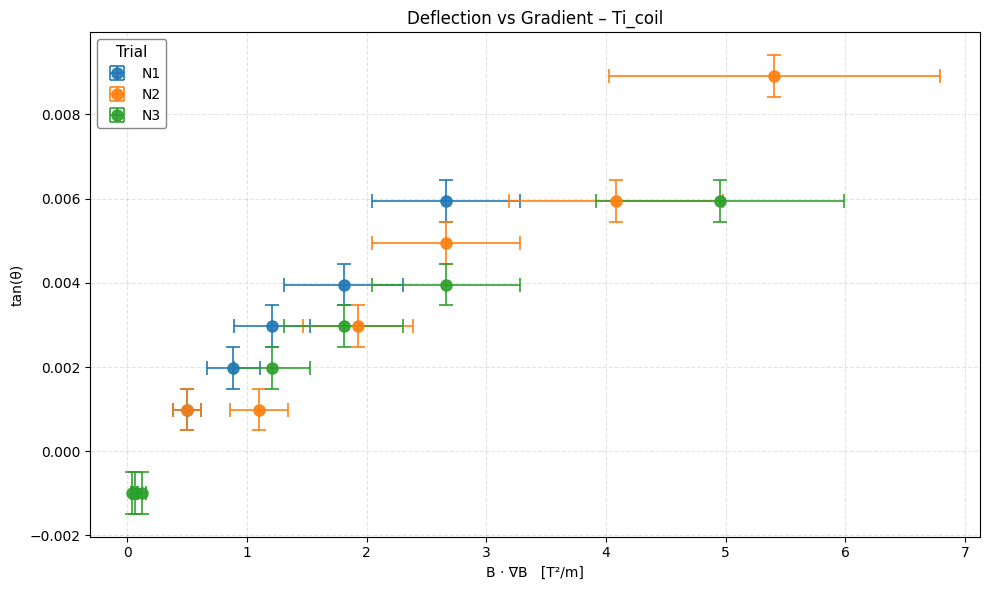

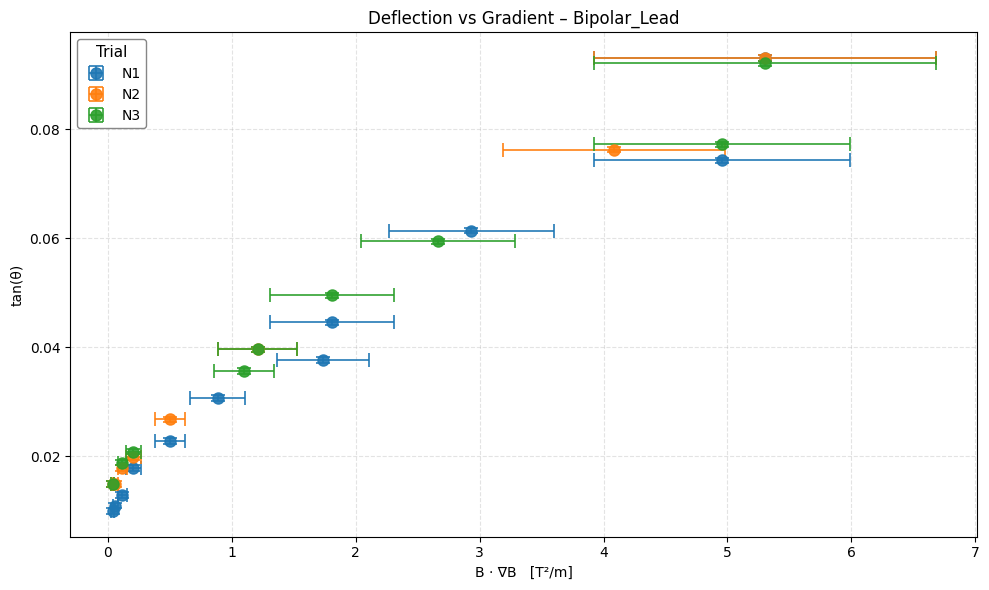

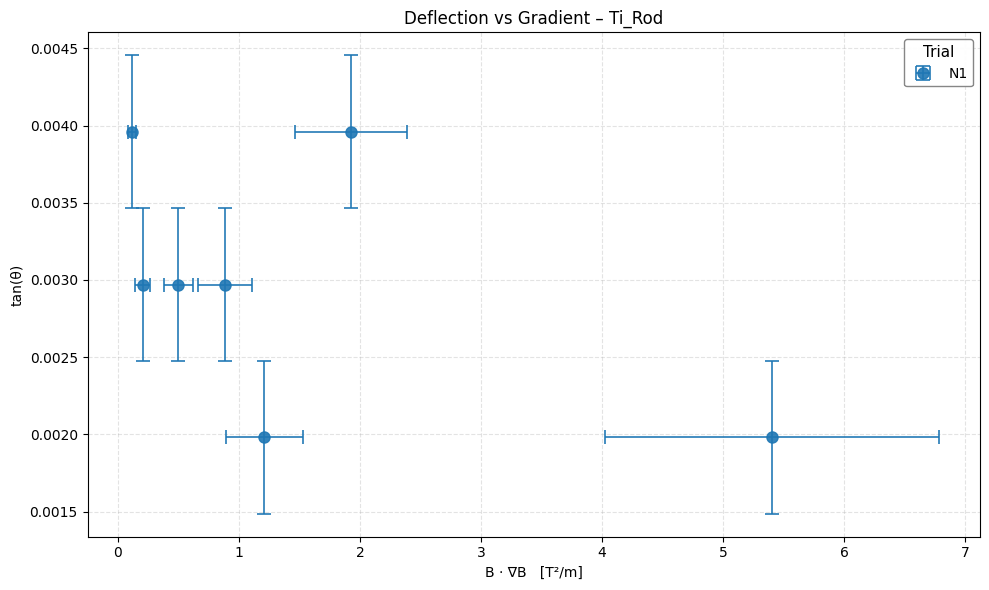

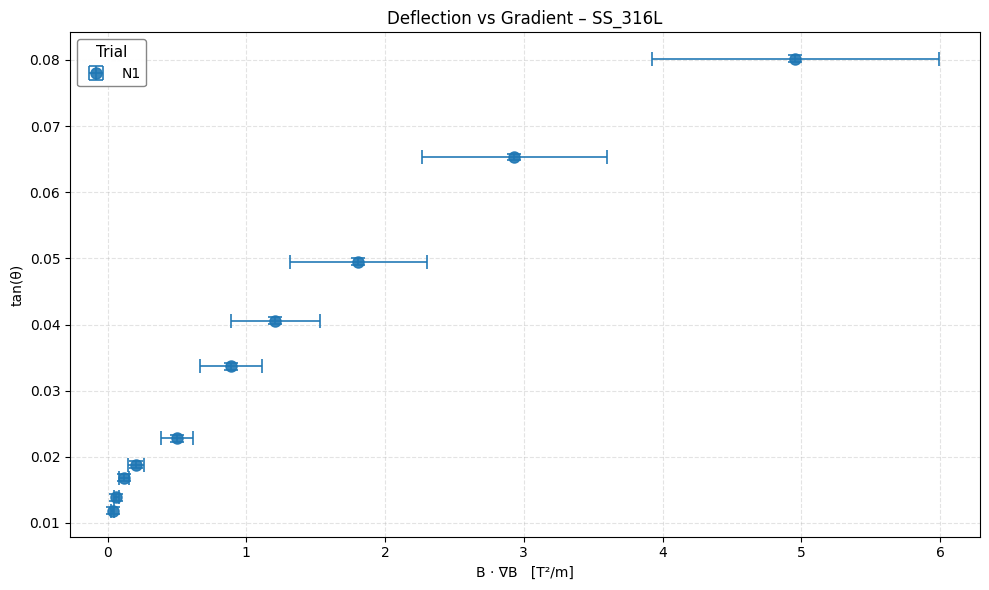

In [23]:
import matplotlib.pyplot as plt

for material, trials_dict in cleaned_materials.items():
    # Skip if no matched data exists
    matched_keys = [k for k in trials_dict if k.endswith('_matched')]
    if not matched_keys:
        continue
    
    plt.figure(figsize=(10, 6))
    
    for trial_name in matched_keys:
        df = trials_dict[trial_name]
        if df.empty:
            continue
            
        short_trial = trial_name.replace('_matched', '')
        label = f"{short_trial}"
        
        plt.errorbar(
            x=df['B_gradB_T2m'],
            y=df['tan_theta'],
            xerr=df['B_gradB_err_T2m'],          # ← x-axis error bars added here
            yerr=df['tan_theta_std'],
            fmt='o', 
            capsize=5, 
            elinewidth=1.3, 
            capthick=1.3,
            markersize=8,
            label=label,
            alpha=0.9,
            zorder=10
        )
    
    plt.xlabel('B · ∇B   [T²/m]')
    plt.ylabel('tan(θ)')
    plt.title(f'Deflection vs Gradient – {material}')
    plt.grid(True, alpha=0.35, linestyle='--')
    
    # Optional: make legend nicer
    plt.legend(
        title='Trial',
        fontsize=10,
        title_fontsize=11,
        frameon=True,
        edgecolor='gray',
        framealpha=0.95
    )
    
    plt.tight_layout()
    
    # Optional: save the figure
    # plt.savefig(f'deflection_gradient_{material}.png', dpi=150, bbox_inches='tight')
    
    plt.show()

In [24]:
from scipy.optimize import curve_fit

def compute_sigma_eff(x_values, sigma_x, sigma_y, model_func, params):
    """
    Computes the effective standard deviation incorporating uncertainties in both x and y.

    Parameters:
    - x_values (array-like): Independent variable values.
    - sigma_x (array-like): Uncertainties in x_values.
    - sigma_y (array-like): Uncertainties in y_values.
    - model_func (function): Function defining the model.
    - params (tuple): Parameters of the model.

    Returns:
    - sigma_eff (array-like): Effective uncertainty combining sigma_x and sigma_y.
    """
    # Compute the derivative df/dx numerically
    delta_x = 1e-6  # Small step for numerical differentiation
    df_dx = (model_func(x_values + delta_x, *params) - model_func(x_values - delta_x, *params)) / (2 * delta_x)

    # Compute effective variance
    sigma_eff_squared = sigma_y**2 + (df_dx * sigma_x)**2
    return np.sqrt(sigma_eff_squared)
    
def perform_curve_fit(x_values, y_values, sigma_x, sigma_y, model_func, initial_guess):
    """
    Performs curve fitting considering uncertainties in both x and y.

    Parameters:
    - x_values (array-like): Independent variable values (observed).
    - y_values (array-like): Dependent variable values (observed).
    - sigma_x (array-like): Uncertainties in x_values.
    - sigma_y (array-like): Uncertainties in y_values.
    - model_func (function): Function defining the model.
    - initial_guess (tuple): Initial guess for model parameters.

    Returns:
    - popt (array): Optimal values for the parameters.
    - pcov (2D array): The estimated covariance of popt.
    """
    # Perform initial fit without sigma_x
    popt, pcov = curve_fit(model_func, x_values, y_values, sigma=sigma_y, absolute_sigma=True, p0=initial_guess)

    # Compute effective sigma with the best-fit parameters
    sigma_eff = compute_sigma_eff(x_values, sigma_x, sigma_y, model_func, popt)

    # Refit using effective sigma
    popt, pcov = curve_fit(model_func, x_values, y_values, sigma=sigma_eff, absolute_sigma=True, p0=popt)

    return popt, pcov

def compute_chi_squared(x_values, y_values, sigma_x, sigma_y, model_func, params):
    """
    Computes chi-squared and reduced chi-squared, incorporating both y and x uncertainties.

    Parameters:
    - x_values (array-like): Independent variable values (observed).
    - y_values (array-like): Dependent variable values (observed).
    - sigma_x (array-like): Uncertainties in x_values.
    - sigma_y (array-like): Uncertainties in y_values.
    - model_func (function): Function defining the model. (linear)
    - params (tuple): Parameters of the model. (Linear is 2)

    Returns:
    - chi_squared (float): The chi-squared value.
    - chi_squared_red (float): The reduced chi-squared value.
    """
    # Compute fitted y-values using the model function
    y_fit_values = model_func(x_values, *params)

    # Compute effective sigma
    sigma_eff = compute_sigma_eff(x_values, sigma_x, sigma_y, model_func, params)

    # Compute chi-squared
    chi_squared = np.sum(((y_values - y_fit_values) ** 2) / sigma_eff**2)

    # Degrees of freedom
    dof = len(y_values) - len(params)

    # Reduced chi-squared
    chi_squared_red = chi_squared / dof

    print("Chi-Squared:", chi_squared)
    print("Reduced Chi-Squared:", chi_squared_red)

    return chi_squared, chi_squared_red


══════════════════════════════════════════════════════════════════════
TI_COIL - Linear Fits
══════════════════════════════════════════════════════════════════════
  N1:
    Slope:      0.00232 ± 0.00062
    Intercept:  -0.00010 ± 0.00070
  N2:
    Slope:      0.00161 ± 0.00031
    Intercept:  -0.00013 ± 0.00054
  N3:
    Slope:      0.00179 ± 0.00024
    Intercept:  -0.00096 ± 0.00028


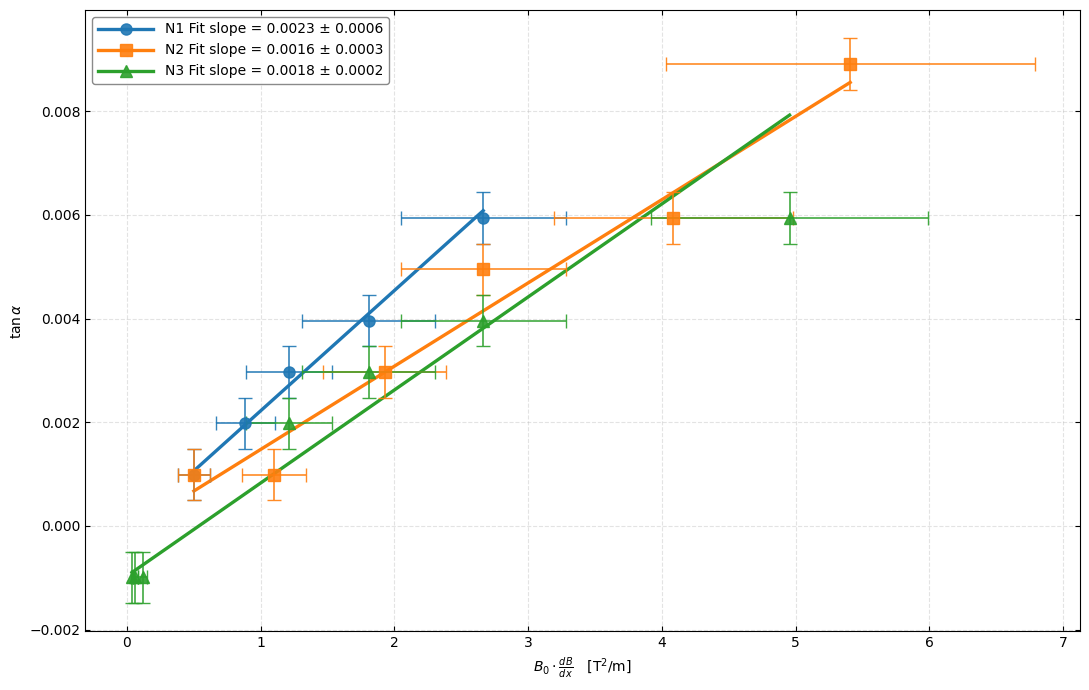


══════════════════════════════════════════════════════════════════════
BIPOLAR_LEAD - Linear Fits
══════════════════════════════════════════════════════════════════════
  N1:
    Slope:      0.01900 ± 0.00133
    Intercept:  0.01023 ± 0.00034
  N2:
    Slope:      0.01954 ± 0.00184
    Intercept:  0.01449 ± 0.00036
  N3:
    Slope:      0.01736 ± 0.00134
    Intercept:  0.01550 ± 0.00041


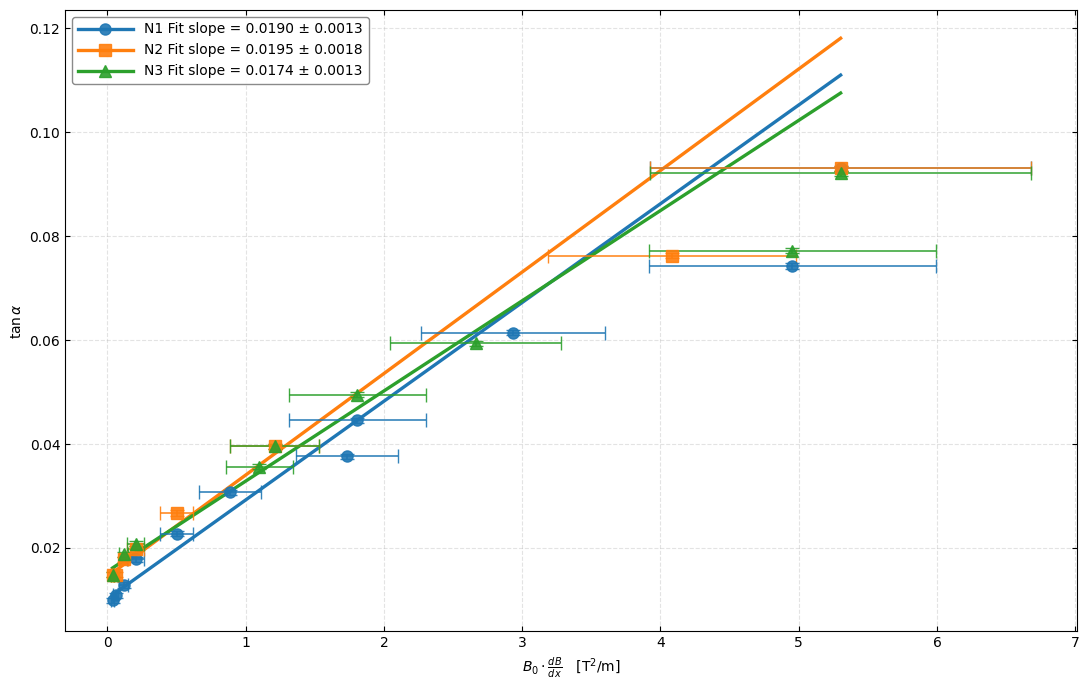


══════════════════════════════════════════════════════════════════════
TI_ROD - Linear Fits
══════════════════════════════════════════════════════════════════════
  N1:
    Slope:      -0.00021 ± 0.00012
    Intercept:  0.00329 ± 0.00025


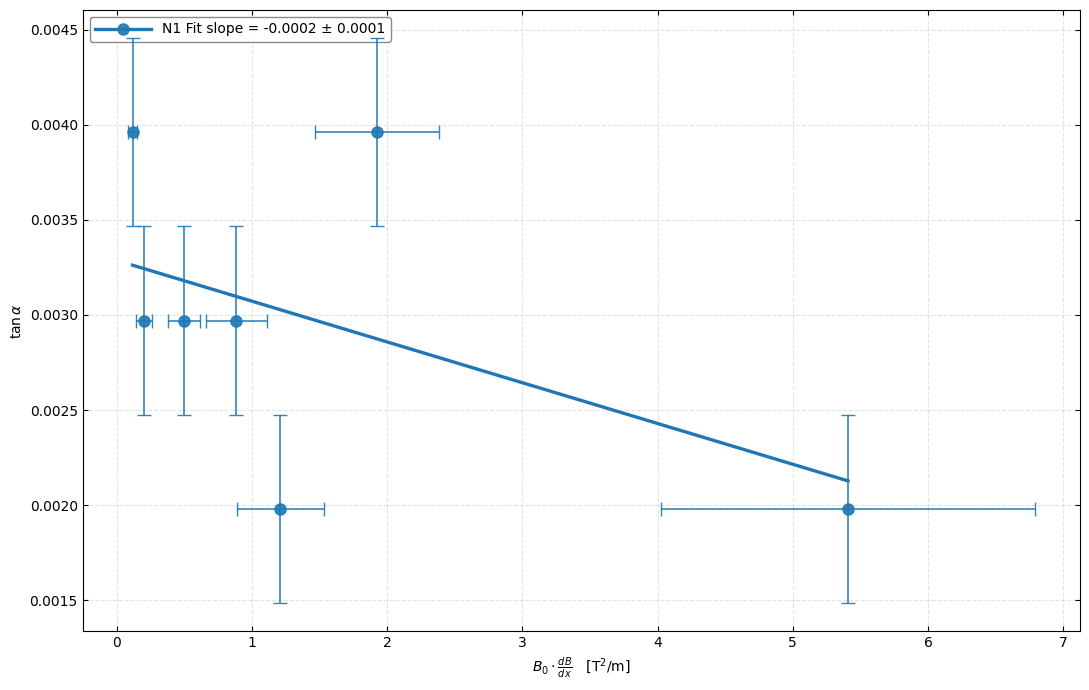


══════════════════════════════════════════════════════════════════════
SS_316L - Linear Fits
══════════════════════════════════════════════════════════════════════
  N1:
    Slope:      0.02055 ± 0.00149
    Intercept:  0.01261 ± 0.00035


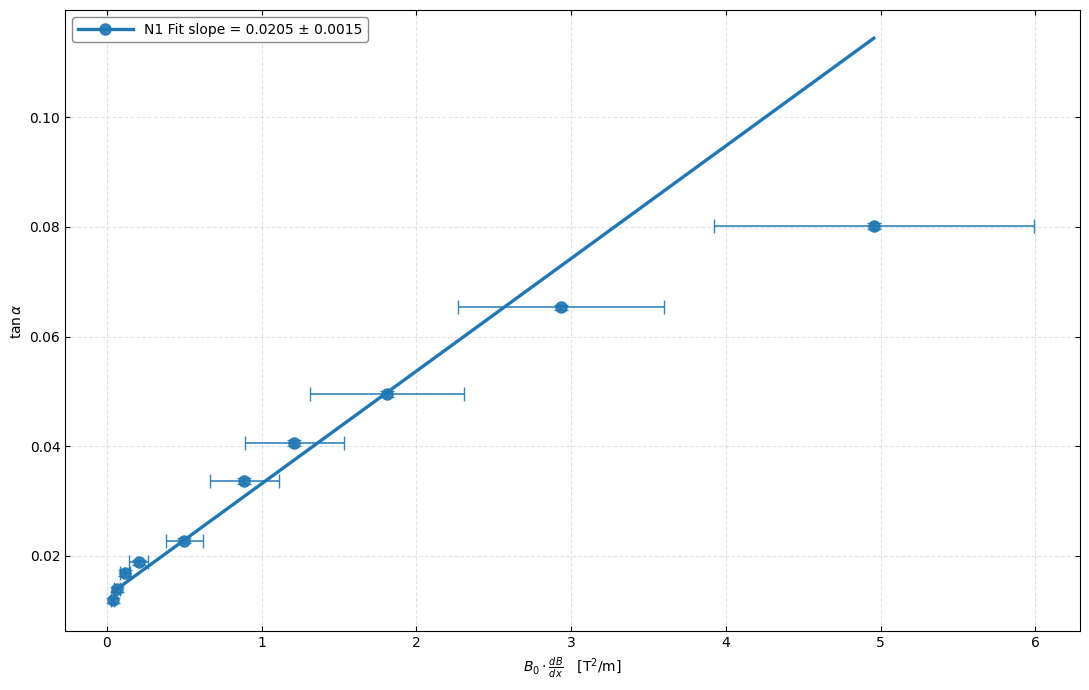

In [25]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

# ── Color & marker cycle for trials ─────────────────────────────────────────────
trial_styles = {
    'N1': {'color': '#1f77b4', 'marker': 'o', 'label': 'N1'},
    'N2': {'color': '#ff7f0e', 'marker': 's', 'label': 'N2'},
    'N3': {'color': '#2ca02c', 'marker': '^', 'label': 'N3'},
    # Add more if you have other trials
}

# Create a new dictionary to store all fit parameters
fit_results = {}

for material, trials_dict in cleaned_materials.items():
    matched_keys = [k for k in trials_dict if k.endswith('_matched')]
    if not matched_keys:
        continue

    print(f"\n{'═'*70}\n{material.upper()} - Linear Fits\n{'═'*70}")

    # Initialize for this material
    fit_results[material] = {}

    fig = plt.figure(figsize=(11, 7))
    ax = fig.add_subplot(111)

    legend_handles = []

    for trial_name in matched_keys:
        df = trials_dict[trial_name]
        if len(df) < 3:
            print(f"  {trial_name} → skipped (only {len(df)} points)")
            continue

        short_trial = trial_name.replace('_matched', '')
        
        style = trial_styles.get(short_trial, 
                               {'color': 'gray', 'marker': 'o', 'label': short_trial})

        color = style['color']
        marker = style['marker']
        label = style['label']

        x_data = df['B_gradB_T2m'].values
        y_data = df['tan_theta'].values
        sigma_x = df['B_gradB_err_T2m'].values
        sigma_y = df['tan_theta_std'].values

        valid = ~np.isnan(x_data) & ~np.isnan(y_data) & ~np.isnan(sigma_x) & ~np.isnan(sigma_y)
        if np.sum(valid) < 3:
            continue

        x_data = x_data[valid]
        y_data = y_data[valid]
        sigma_x = sigma_x[valid]
        sigma_y = sigma_y[valid]

        try:
            popt, pcov = perform_curve_fit(
                x_values=x_data, y_values=y_data,
                sigma_x=sigma_x, sigma_y=sigma_y,
                model_func=linear_model,
                initial_guess=[0.0, 0.0]
            )

            slope, intercept = popt
            slope_err, intercept_err = np.sqrt(np.diag(pcov))

            # ── Store the fit results ──────────────────────────────────────
            fit_results[material][short_trial] = {
                'slope': slope,
                'slope_err': slope_err,
                'intercept': intercept,
                'intercept_err': intercept_err,
                'n_points': len(x_data),
                # Optional extra info you might want later:
                'x_range': (float(x_data.min()), float(x_data.max())),
                'y_range': (float(y_data.min()), float(y_data.max()))
            }

            # Fit line
            x_fit = np.linspace(x_data.min(), x_data.max(), 200)
            y_fit = linear_model(x_fit, *popt)

            # Plot data
            err = ax.errorbar(
                x_data, y_data,
                xerr=sigma_x, yerr=sigma_y,
                fmt=marker,
                color=color,
                ecolor=color,
                capsize=5,
                elinewidth=1.2,
                markersize=8,
                alpha=0.9,
                zorder=10,
                label=None
            )

            # Plot fit
            line, = ax.plot(
                x_fit, y_fit,
                '-', linewidth=2.4,
                color=color,
                zorder=5
            )

            # Legend entry
            legend_handles.append(
                (err, line, f"{label} Fit slope = {slope:.4f} ± {slope_err:.4f}")
            )

            # Print (same format as you wanted)
            print(f"  {short_trial}:")
            print(f"    Slope:      {slope:.5f} ± {slope_err:.5f}")
            print(f"    Intercept:  {intercept:.5f} ± {intercept_err:.5f}")

        except Exception as e:
            print(f"  Fit failed for {trial_name}: {e}")
            continue

    # Legend
    if legend_handles:
        handles = [(err.lines[0], line) for err, line, _ in legend_handles]
        labels = [lab for _, _, lab in legend_handles]
        
        ax.legend(
            handles=handles,
            labels=labels,
            loc='upper left',
            fontsize=10,
            frameon=True,
            edgecolor='gray',
            framealpha=0.92,
            handlelength=4
        )

    ax.set_xlabel(r"$B_0 \cdot \frac{dB}{dx}$   [T$^2$/m]")
    ax.set_ylabel(r"$\tan\alpha$")
    ax.grid(True, alpha=0.35, linestyle='--')
    ax.tick_params(direction='in', top=True, right=True)

    plt.tight_layout()
    plt.show()

In [26]:
worst_case_grad = 10

for mat in fit_results:
    slope = fit_results[mat].get('N1', fit_results[mat].get('N2', {}))['slope']
    tan_theta_estimated = slope * worst_case_grad
    theta_deg_estimated = np.degrees(np.arctan(tan_theta_estimated))
    print(f"{mat:15} at {worst_case_grad} T²/m means tan(θ) ≈ {tan_theta_estimated:.4f} then θ ≈ {theta_deg_estimated:.1f}°")

Ti_coil         at 10 T²/m means tan(θ) ≈ 0.0232 then θ ≈ 1.3°
Bipolar_Lead    at 10 T²/m means tan(θ) ≈ 0.1900 then θ ≈ 10.8°
Ti_Rod          at 10 T²/m means tan(θ) ≈ -0.0021 then θ ≈ -0.1°
SS_316L         at 10 T²/m means tan(θ) ≈ 0.2055 then θ ≈ 11.6°


In [27]:
from scipy.constants import mu_0 as mu0 # 4π × 10⁻⁷ N A⁻²


# ────────────────────────────────────────────────────────────────
# Constants
MM_TO_M   = 1e-3
G_TO_KG   = 1e-3

# Dimensions & masses
length_mm = {
    'Bipolar_Lead': 378,
    'Ti_Rod':       23,
    'SS_316L':      22,
    # 'Ti_coil':    unknown / effective length not given
}

diameter_mm = {
    'Bipolar_Lead': 0.46,
    'Ti_coil':      1.02,
    'Ti_Rod':       1.02,
    'SS_316L':      0.76,
}

total_mass_g = {
    'Bipolar_Lead': 0.1386,
    'Ti_coil':      1.7964,
    'Ti_Rod':       0.1549,
    'SS_316L':      0.1690,
}

sigma_length_mm   = 0.01
sigma_diameter_mm = 0.01
sigma_mass_g      = 0.0001

# ────────────────────────────────────────────────────────────────
# Helper: simple cylindrical volume & density
def calc_cylinder_properties(L_mm, D_mm, m_g):
    L = L_mm * MM_TO_M
    r = (D_mm * MM_TO_M) / 2
    V = np.pi * r**2 * L
    rho = (m_g * G_TO_KG) / V if V > 0 else np.nan
    return L, r, V, rho

# ────────────────────────────────────────────────────────────────
# Choose representative slope per material
# weighted by number of points
representative = {}

for mat, trials in fit_results.items():
    if not trials:
        continue
    
    slopes      = []
    slope_errs  = []
    weights     = []
    
    for trial, p in trials.items():
        if 'slope' not in p:
            continue
        slopes.append(p['slope'])
        slope_errs.append(p['slope_err'])
        weights.append(p.get('n_points', 1))
    
    if not slopes:
        continue
    
    # Weighted mean slope
    w = np.array(weights)
    slope_mean = np.average(slopes, weights=w)
    # Approximate uncertainty (simple weighted std + avg err)
    slope_var = np.average((np.array(slopes) - slope_mean)**2, weights=w)
    slope_err_mean = np.sqrt(slope_var + np.average(np.array(slope_errs)**2))
    
    representative[mat] = {
        'slope':      float(slope_mean),
        'slope_err':  float(slope_err_mean),
        'n_trials':   len(slopes),
        'total_points': sum(weights)
    }

print("Representative slopes per material:")
for mat, res in representative.items():
    print(f"{mat:15}  slope = {res['slope']:.2e} ± {res['slope_err']:.2e}    (from {res['n_trials']} trials, {res['total_points']} pts)")

Representative slopes per material:
Ti_coil          slope = 1.88e-03 ± 5.11e-04    (from 3 trials, 18 pts)
Bipolar_Lead     slope = 1.86e-02 ± 1.77e-03    (from 3 trials, 28 pts)
Ti_Rod           slope = -2.14e-04 ± 1.24e-04    (from 1 trials, 7 pts)
SS_316L          slope = 2.05e-02 ± 1.49e-03    (from 1 trials, 10 pts)


In [28]:
from scipy.constants import mu_0 as mu0
import numpy as np

g = 9.834  # m/s2

print("\nMass magnetic susceptibility χ_m (independent of geometry)\n" + "═"*65)

chi_m_results = {}

for mat, res in representative.items():
    slope     = res['slope']
    slope_err = res['slope_err']
    
    # χ_m = slope × μ₀ × g
    chi_m     = slope * mu0 * g
    chi_m_err = slope_err * mu0 * g   # dominant uncertainty term
    
    chi_m_results[mat] = {
        'chi_m':     float(chi_m),
        'chi_m_err': float(chi_m_err),
        'slope':     slope,
        'slope_err': slope_err,
        'n_trials':  res.get('n_trials', 1),
        'total_pts': res.get('total_points', 0)
    }
    
    print(f"{mat:15}")
    print(f"  χ_m  = {chi_m:12.2e} ± {chi_m_err:10.2e}   m³/kg")
    print(f"  from slope = {slope:9.2e} ± {slope_err:9.2e}")
    print(f"  ({res.get('n_trials', '?')} trials, {res.get('total_points', '?')} points)")
    print()

# ────────────────────────────────────────────────────────────────
# only for materials where geometry is reasonably reliable

print("\nVolume susceptibility χ = χ_m × ρ   (cylindrical approximation + PLA mesh included)\n" + "═"*75)

for mat in ['Bipolar_Lead', 'Ti_Rod', 'SS_316L']:   # ← choose which to attempt
    if mat not in chi_m_results or mat not in length_mm:
        continue
    
    L_mm = length_mm[mat]
    D_mm = diameter_mm.get(mat, np.nan)
    if np.isnan(D_mm):
        continue
    
    m_g = total_mass_g[mat]
    L, r, V, rho = calc_cylinder_properties(L_mm, D_mm, m_g)
    
    if rho <= 0 or np.isnan(rho):
        print(f"{mat:15} → invalid density")
        continue
    
    chi_m     = chi_m_results[mat]['chi_m']
    chi_m_err = chi_m_results[mat]['chi_m_err']
    
    chi     = chi_m * rho
    # rough uncertainty (slope error + ~5% density uncertainty)
    chi_err = np.sqrt( (chi_m_err * rho)**2 + (chi_m * 0.05 * rho)**2 )
    
    print(f"{mat:15}")
    print(f"  length   = {L_mm:4.0f} mm    diameter = {D_mm:5.2f} mm")
    print(f"  volume   = {V:.2e} m³")
    print(f"  density  = {rho:7.1f} kg/m³   (apparent, includes PLA mesh)")
    print(f"  χ        = {chi:12.2e} ± {chi_err:10.2e}")
    print(f"  χ_m used = {chi_m:12.2e} m³/kg")
    print()


Mass magnetic susceptibility χ_m (independent of geometry)
═════════════════════════════════════════════════════════════════
Ti_coil        
  χ_m  =     2.32e-08 ±   6.31e-09   m³/kg
  from slope =  1.88e-03 ±  5.11e-04
  (3 trials, 18 points)

Bipolar_Lead   
  χ_m  =     2.30e-07 ±   2.18e-08   m³/kg
  from slope =  1.86e-02 ±  1.77e-03
  (3 trials, 28 points)

Ti_Rod         
  χ_m  =    -2.65e-09 ±   1.53e-09   m³/kg
  from slope = -2.14e-04 ±  1.24e-04
  (1 trials, 7 points)

SS_316L        
  χ_m  =     2.54e-07 ±   1.84e-08   m³/kg
  from slope =  2.05e-02 ±  1.49e-03
  (1 trials, 10 points)


Volume susceptibility χ = χ_m × ρ   (cylindrical approximation + PLA mesh included)
═══════════════════════════════════════════════════════════════════════════
Bipolar_Lead   
  length   =  378 mm    diameter =  0.46 mm
  volume   = 6.28e-08 m³
  density  =  2206.3 kg/m³   (apparent, includes PLA mesh)
  χ        =     5.08e-04 ±   5.45e-05
  χ_m used =     2.30e-07 m³/kg

Ti_Rod        

In [ ]:
# AJ suggestion find error in probe mesuarement, static magnetic field in a single position longer time

In [43]:
grad_results['00']

,matched_pos,avg_flux,yerr_avg,dB_dx,BgradB
0,0.000000,26838.500,269.38500,138.668596,3.721657e+06
1,12.274510,26679.250,267.79250,119.358550,3.184397e+06
2,24.549020,24996.500,250.96500,77.943194,1.948307e+06
3,36.823529,24953.750,250.53750,14.547337,3.630106e+05
4,49.098039,24309.000,244.09000,42.905986,1.043002e+06
...,...,...,...,...,...
94,1202.901961,620.125,7.20125,1.424643,8.834570e+02
95,1215.176471,597.875,6.97875,1.383912,8.274064e+02
96,1227.450980,576.350,6.76350,1.349408,7.777313e+02
97,1239.725490,576.350,6.76350,1.321131,7.614341e+02


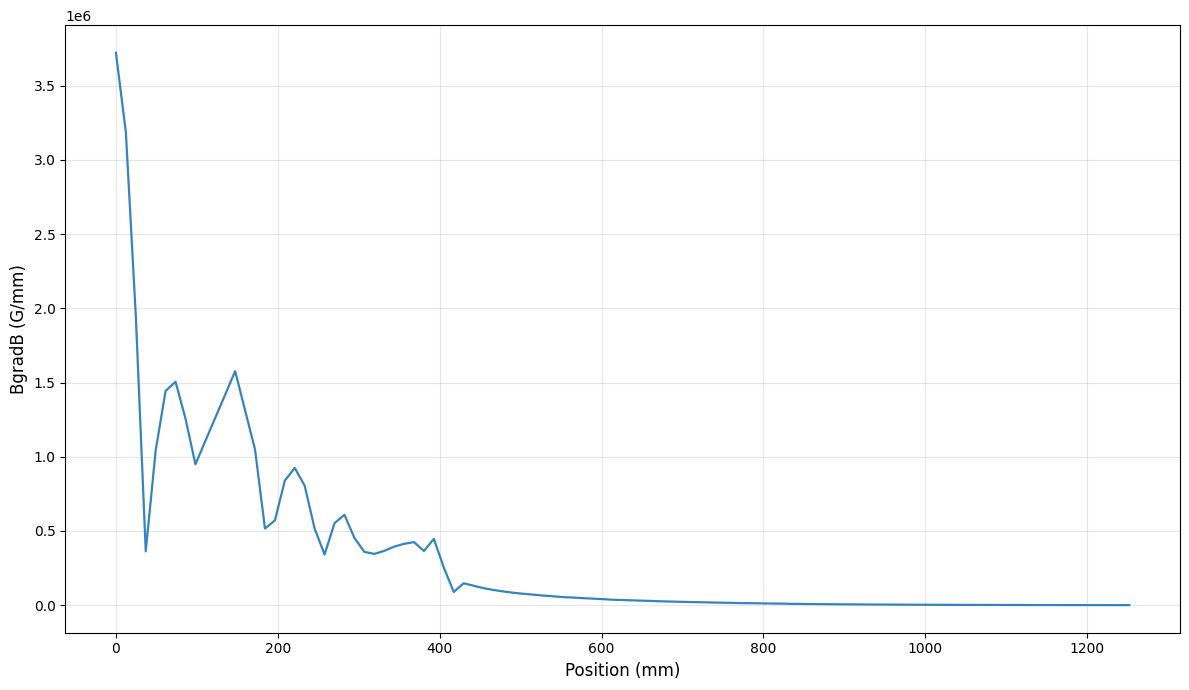

In [46]:
df = grad_results['00']

plt.figure(figsize=(12, 7))


plt.plot(
    df['matched_pos'],
    df['BgradB'],
    markersize=4,
    linewidth=1.6,
    alpha=0.9
)

plt.xlabel('Position (mm)', fontsize=12)
plt.ylabel('BgradB (G/mm)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

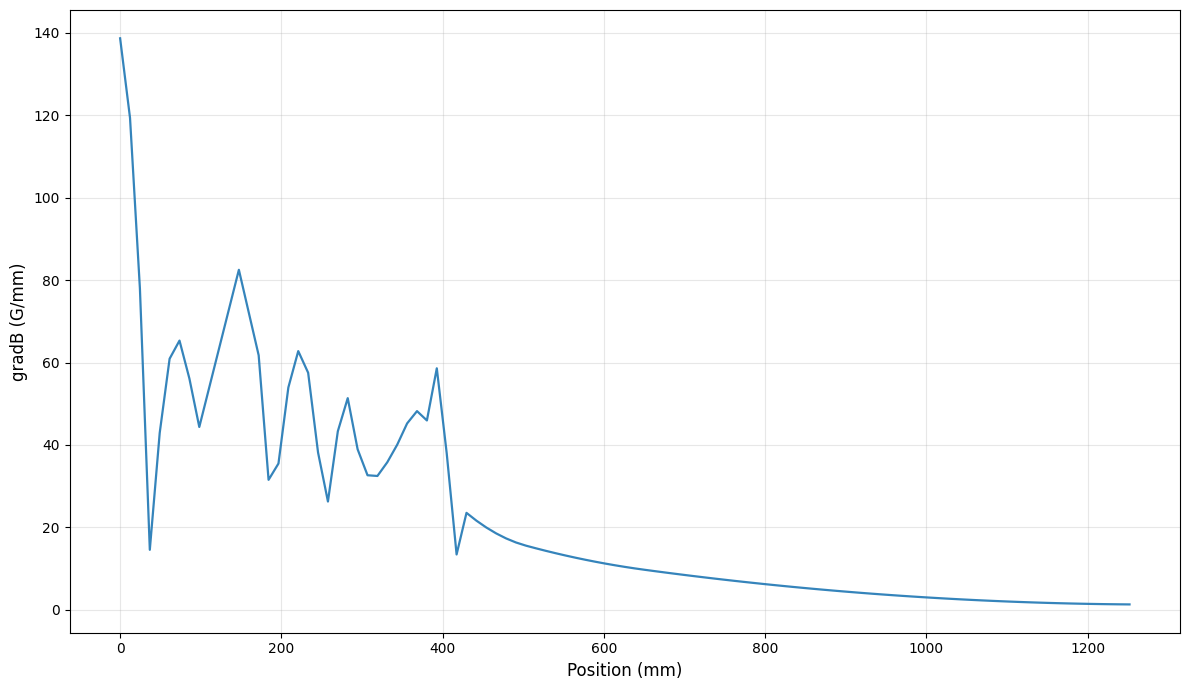

In [47]:
plt.figure(figsize=(12, 7))


plt.plot(
    df['matched_pos'],
    df['dB_dx'],
    markersize=4,
    linewidth=1.6,
    alpha=0.9
)

plt.xlabel('Position (mm)', fontsize=12)
plt.ylabel('gradB (G/mm)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()